In [1]:
# making sure I import all I need for the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

%matplotlib inline


In [2]:
#import data set

data = pd.read_csv('data\data_clean.csv')
data.head()

State  ST   Fips                    County  Precincts    Votes  \
0  Arkansas  AR   5043     Drew County, Arkansas       17.0   6590.0   
1  Arkansas  AR   5087  Madison County, Arkansas       20.0   6829.0   
2   Georgia  GA  13159    Jasper County, Georgia        3.0   6016.0   
3  Colorado  CO   8037    Eagle County, Colorado       30.0  22611.0   
4   Georgia  GA  13091     Dodge County, Georgia       16.0   6995.0   

   Less Than High School Diploma  At Least High School Diploma  \
0                           19.4                          80.6   
1                           24.2                          75.8   
2                           21.7                          78.3   
3                           12.8                          87.2   
4                           23.1                          76.9   

   At Least Bachelors's Degree  Graduate Degree  ...  Adult.obesity  Diabetes  \
0                         19.4              5.7  ...          0.323     0.126   
1                         13.4              4.1  ...          0.328     0.135   
2                         13.3              5.6  ...          0.298     0.118   
3                         45.9             11.7  ...          0.132     0.036   
4                         13.8              4.8  ...          0.358     0.153   

   Sexually.transmitted.infections  HIV.prevalence.rate  Uninsured  \
0                            747.3                 79.9      0.197   
1                            247.2                131.3      0.239   
2                            324.1                402.4      0.239   
3                            190.9                133.7      0.230   
4                            497.9                315.8      0.208   

   Unemployment  Violent.crime  Homicide.rate  Injury.deaths  Infant.mortality  
0         0.108         449.02       6.285803           82.0          7.737553  
1         0.053         245.83       6.285803           96.8          7.737553  
2         0.096         205.60       6.285803           71.6          7.737553  
3         0.081         123.88       6.285803           42.9          3.500000  
4         0.115         477.48       8.110000           79.4          7.737553  

[5 rows x 47 columns]

In [3]:
# import dataset

votes = pd.read_csv('data/votes_clean.csv')
votes.head()

Democrats 08 (Votes)  Democrats 12 (Votes)  Republicans 08 (Votes)  \
0                2598.0                2630.0                  3860.0   
1                2144.0                2099.0                  3972.0   
2                1935.0                1845.0                  3916.0   
3               13191.0               12792.0                  8181.0   
4                2595.0                2442.0                  5543.0   

   Republicans 12 (Votes)  votes16_trumpd  votes16_clintonh   Fips  \
0                  3887.0          3967.0            2364.0   5043   
1                  4263.0          4917.0            1587.0   5087   
2                  4136.0          4353.0            1544.0  13159   
3                  9411.0          8153.0           12652.0   8037   
4                  5214.0          5021.0            1836.0  13091   

   Democrats08_Voteshare  Republicans08_Voteshare  Democrats12_Voteshare  \
0               0.402292                 0.597708               0.403560   
1               0.350556                 0.649444               0.329928   
2               0.330713                 0.669287               0.308477   
3               0.617209                 0.382791               0.576138   
4               0.318874                 0.681126               0.318966   

   Republicans12_Voteshare  Democrats16_Voteshare  Republicans16_Voteshare  
0                 0.596440               0.373401                 0.626599  
1                 0.670072               0.244004                 0.755996  
2                 0.691523               0.261828                 0.738172  
3                 0.423862               0.608123                 0.391877  
4                 0.681034               0.267756                 0.732244

In [4]:
votes.columns

Index(['Democrats 08 (Votes)', 'Democrats 12 (Votes)',
       'Republicans 08 (Votes)', 'Republicans 12 (Votes)', 'votes16_trumpd',
       'votes16_clintonh', 'Fips', 'Democrats08_Voteshare',
       'Republicans08_Voteshare', 'Democrats12_Voteshare',
       'Republicans12_Voteshare', 'Democrats16_Voteshare',
       'Republicans16_Voteshare'],
      dtype='object')

In [5]:
# I noticed the votes tables now has votes 08, so I'm dropping those columns

votes = votes.drop(['Democrats 08 (Votes)', 'Republicans 08 (Votes)','Republicans08_Voteshare', 'Democrats08_Voteshare' ],axis=1)
votes

Democrats 12 (Votes)  Republicans 12 (Votes)  votes16_trumpd  \
0                   2630.0                  3887.0          3967.0   
1                   2099.0                  4263.0          4917.0   
2                   1845.0                  4136.0          4353.0   
3                  12792.0                  9411.0          8153.0   
4                   2442.0                  5214.0          5021.0   
...                    ...                     ...             ...   
3136               62388.0                105176.0        104441.0   
3137                7062.0                 13633.0         15586.0   
3138               81464.0                 59405.0         65346.0   
3139                6144.0                  8162.0          9992.0   
3140                 115.0                  1082.0           962.0   

      votes16_clintonh   Fips  Democrats12_Voteshare  Republicans12_Voteshare  \
0               2364.0   5043               0.403560                 0.596440   
1               1587.0   5087               0.329928                 0.670072   
2               1544.0  13159               0.308477                 0.691523   
3              12652.0   8037               0.576138                 0.423862   
4               1836.0  13091               0.318966                 0.681034   
...                ...    ...                    ...                      ...   
3136           56700.0  39017               0.372323                 0.627677   
3137            4537.0  39091               0.341242                 0.658758   
3138           64958.0  39093               0.578296                 0.421704   
3139            5455.0  40021               0.429470                 0.570530   
3140              70.0  40025               0.096074                 0.903926   

      Democrats16_Voteshare  Republicans16_Voteshare  
0                  0.373401                 0.626599  
1                  0.244004                 0.755996  
2                  0.261828                 0.738172  
3                  0.608123                 0.391877  
4                  0.267756                 0.732244  
...                     ...                      ...  
3136               0.351866                 0.648134  
3137               0.225463                 0.774537  
3138               0.498511                 0.501489  
3139               0.353143                 0.646857  
3140               0.067829                 0.932171  

[3141 rows x 9 columns]

In [6]:
# I will also rename the columns and make my life easier. 

In [7]:
votes.columns = ['Democrats_12', 'Republicans_12', 'Republicans_16',
       'Democrats_16', 'Fips', 'Democrats12_Voteshare',
       'Republicans12_Voteshare', 'Democrats16_Voteshare',
       'Republicans16_Voteshare']
votes.head()

Democrats_12  Republicans_12  Republicans_16  Democrats_16   Fips  \
0        2630.0          3887.0          3967.0        2364.0   5043   
1        2099.0          4263.0          4917.0        1587.0   5087   
2        1845.0          4136.0          4353.0        1544.0  13159   
3       12792.0          9411.0          8153.0       12652.0   8037   
4        2442.0          5214.0          5021.0        1836.0  13091   

   Democrats12_Voteshare  Republicans12_Voteshare  Democrats16_Voteshare  \
0               0.403560                 0.596440               0.373401   
1               0.329928                 0.670072               0.244004   
2               0.308477                 0.691523               0.261828   
3               0.576138                 0.423862               0.608123   
4               0.318966                 0.681034               0.267756   

   Republicans16_Voteshare  
0                 0.626599  
1                 0.755996  
2                 0.738172  
3                 0.391877  
4                 0.732244

In [8]:
#Check if data types are ok
votes.dtypes


Democrats_12               float64
Republicans_12             float64
Republicans_16             float64
Democrats_16               float64
Fips                         int64
Democrats12_Voteshare      float64
Republicans12_Voteshare    float64
Democrats16_Voteshare      float64
Republicans16_Voteshare    float64
dtype: object

In [9]:
data.dtypes


State                                                          object
ST                                                             object
Fips                                                            int64
County                                                         object
Precincts                                                     float64
Votes                                                         float64
Less Than High School Diploma                                 float64
At Least High School Diploma                                  float64
At Least Bachelors's Degree                                   float64
Graduate Degree                                               float64
School Enrollment                                             float64
Median Earnings 2010                                          float64
White (Not Latino) Population                                 float64
African American Population                                   float64
Native American Popu

In [10]:
# Double check for nulls

votes.isna().sum()

Democrats_12               0
Republicans_12             0
Republicans_16             0
Democrats_16               0
Fips                       0
Democrats12_Voteshare      0
Republicans12_Voteshare    0
Democrats16_Voteshare      0
Republicans16_Voteshare    0
dtype: int64

In [11]:
data.isna().sum()

State                                                         0
ST                                                            0
Fips                                                          0
County                                                        0
Precincts                                                     0
Votes                                                         0
Less Than High School Diploma                                 0
At Least High School Diploma                                  0
At Least Bachelors's Degree                                   0
Graduate Degree                                               0
School Enrollment                                             0
Median Earnings 2010                                          0
White (Not Latino) Population                                 0
African American Population                                   0
Native American Population                                    0
Asian American Population               

In [12]:
# all seems good I can finally join the dataset

In [13]:
mydf = pd.merge(votes, data, on='Fips' )

In [14]:
mydf.info()
#Fips is still int64, since it's an identifier I'm making it a string

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3141 entries, 0 to 3140
Data columns (total 55 columns):
Democrats_12                                                  3141 non-null float64
Republicans_12                                                3141 non-null float64
Republicans_16                                                3141 non-null float64
Democrats_16                                                  3141 non-null float64
Fips                                                          3141 non-null int64
Democrats12_Voteshare                                         3141 non-null float64
Republicans12_Voteshare                                       3141 non-null float64
Democrats16_Voteshare                                         3141 non-null float64
Republicans16_Voteshare                                       3141 non-null float64
State                                                         3141 non-null object
ST                                                      

### Stats and Politics 2: Data Analysis
Build on the previous deliverable to conduct some analysis of the presidential election data.

1 - Which data columns are correlated with the Republican vote share? Which columns are not? Does this pattern appear in both elections? Are these correlations statistically significant?

2 - Conduct a statistical test to see whether the mean Republican party vote share across all of the counties are different between the 2 elections. Which statistical test is appropriate here? Describe why you’ve chosen your test and interpret your results. Assume that the people who voted in each county are a representative sample of its population.

3 - Fit a statistical model that predicts the 2016 relative vote share of the Republican party within a county using the county-level demographic data. Explain why you chose that particular model. When building your model, answer the following questions:

What are the data points? What are the independent and dependent variables?
How good is the fit of your model? What metric is a good measure to evaluate your model? Interpret your results.

#### 1 - Which data columns are correlated with the Republican vote share? Which columns are not? Does this pattern appear in both elections? Are these correlations statistically significant?

In [15]:
pd.set_option('display.max_columns',500)

In [16]:
# First I'll take a quick look at the entire dataframe correlations

mydf.corr()
# This is kind of difficult to read, I need to isolate just republicans vote share some how


Democrats_12  \
Democrats_12                                            1.000000   
Republicans_12                                          0.855817   
Republicans_16                                          0.817864   
Democrats_16                                            0.993720   
Fips                                                   -0.060039   
Democrats12_Voteshare                                   0.328550   
Republicans12_Voteshare                                -0.328550   
Democrats16_Voteshare                                   0.401650   
Republicans16_Voteshare                                -0.401650   
Precincts                                               0.922546   
Votes                                                   0.967766   
Less Than High School Diploma                          -0.100874   
At Least High School Diploma                            0.093191   
At Least Bachelors's Degree                             0.351697   
Graduate Degree                                         0.349558   
School Enrollment                                       0.123632   
Median Earnings 2010                                    0.297955   
White (Not Latino) Population                          -0.224864   
African American Population                             0.097404   
Native American Population                             -0.036331   
Asian American Population                               0.458408   
Other Race or Races                                     0.093977   
Latino Population                                       0.153371   
Children Under 6 Living in Poverty                     -0.097099   
Adults 65 and Older Living in Poverty                  -0.100037   
Total Population                                        0.967662   
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4        0.134767   
Poverty.Rate.below.federal.poverty.threshold           -0.090273   
Gini.Coefficient                                        0.152955   
Child.Poverty.living.in.families.below.the.pove...     -0.080205   
Management.professional.and.related.occupations         0.266975   
Service.occupations                                    -0.024804   
Sales.and.office.occupations                            0.215032   
Farming.fishing.and.forestry.occupations               -0.163221   
Construction.extraction.maintenance.and.repair....     -0.223764   
Production.transportation.and.material.moving.o...     -0.196224   
SIRE_homogeneity                                       -0.273171   
median_age                                             -0.164029   
Low.birthweight                                        -0.016894   
Teen.births                                            -0.122325   
Children.in.single.parent.households                    0.061370   
Adult.smoking                                          -0.194049   
Adult.obesity                                          -0.237088   
Diabetes                                               -0.175279   
Sexually.transmitted.infections                         0.138569   
HIV.prevalence.rate                                     0.310281   
Uninsured                                              -0.073553   
Unemployment                                            0.050391   
Violent.crime                                           0.246070   
Homicide.rate                                           0.040098   
Injury.deaths                                          -0.219359   
Infant.mortality                                       -0.145290   

                                                    Republicans_12  \
Democrats_12                                              0.855817   
Republicans_12                                            1.000000   
Republicans_16                                            0.985417   
Democrats_16                                              0.866232   
Fips                                                     -0.059730   
Democrats12_Voteshare      

In [17]:
mydf = mydf.astype({'Fips': 'str'})

In [18]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3141 entries, 0 to 3140
Data columns (total 55 columns):
Democrats_12                                                  3141 non-null float64
Republicans_12                                                3141 non-null float64
Republicans_16                                                3141 non-null float64
Democrats_16                                                  3141 non-null float64
Fips                                                          3141 non-null object
Democrats12_Voteshare                                         3141 non-null float64
Republicans12_Voteshare                                       3141 non-null float64
Democrats16_Voteshare                                         3141 non-null float64
Republicans16_Voteshare                                       3141 non-null float64
State                                                         3141 non-null object
ST                                                     

I'll Isolate the republicans vote share to make it easier to read the correlations:

I have many columns to compare with, I need to get multiple linear regressions to access the information


In [19]:
#Checking the name of the columns
mydf.columns

Index(['Democrats_12', 'Republicans_12', 'Republicans_16', 'Democrats_16',
       'Fips', 'Democrats12_Voteshare', 'Republicans12_Voteshare',
       'Democrats16_Voteshare', 'Republicans16_Voteshare', 'State', 'ST',
       'County', 'Precincts', 'Votes', 'Less Than High School Diploma',
       'At Least High School Diploma', 'At Least Bachelors's Degree',
       'Graduate Degree', 'School Enrollment', 'Median Earnings 2010',
       'White (Not Latino) Population', 'African American Population',
       'Native American Population', 'Asian American Population',
       'Other Race or Races', 'Latino Population',
       'Children Under 6 Living in Poverty',
       'Adults 65 and Older Living in Poverty', 'Total Population',
       'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
       'Poverty.Rate.below.federal.poverty.threshold', 'Gini.Coefficient',
       'Child.Poverty.living.in.families.below.the.poverty.line',
       'Management.professional.and.related.occupations',
       'Serv

I don't want to compare to all the columns. It's obvious there is correlation in republicans vote share to all other votes columns, so I'll set up a new clean Data Frame to make my job easier.

In [20]:
#dropping columns that I don't want to check for correlation for 2012 republicans’ votes
# I don't need to drop the Fips as I already made it a String, one less correlation to check.

RepShare16 = mydf.drop(columns=['Democrats_12','Republicans_12','Republicans_16', 'Democrats_16', 
                               'Democrats12_Voteshare','Democrats16_Voteshare','Republicans12_Voteshare'])

In [21]:
RepShare16.head()

Fips  Republicans16_Voteshare     State  ST                    County  \
0   5043                 0.626599  Arkansas  AR     Drew County, Arkansas   
1   5087                 0.755996  Arkansas  AR  Madison County, Arkansas   
2  13159                 0.738172   Georgia  GA    Jasper County, Georgia   
3   8037                 0.391877  Colorado  CO    Eagle County, Colorado   
4  13091                 0.732244   Georgia  GA     Dodge County, Georgia   

   Precincts    Votes  Less Than High School Diploma  \
0       17.0   6590.0                           19.4   
1       20.0   6829.0                           24.2   
2        3.0   6016.0                           21.7   
3       30.0  22611.0                           12.8   
4       16.0   6995.0                           23.1   

   At Least High School Diploma  At Least Bachelors's Degree  Graduate Degree  \
0                          80.6                         19.4              5.7   
1                          75.8                         13.4              4.1   
2                          78.3                         13.3              5.6   
3                          87.2                         45.9             11.7   
4                          76.9                         13.8              4.8   

   School Enrollment  Median Earnings 2010  White (Not Latino) Population  \
0               78.5          21988.947300                          67.90   
1               76.4          23365.948890                          92.00   
2               70.2          25363.060950                          72.70   
3               64.1          35484.543175                          68.40   
4               61.5          26927.608255                          66.15   

   African American Population  Native American Population  \
0                        27.95                        0.15   
1                         0.25                        1.25   
2                        22.20                        0.40   
3                         0.30                        0.25   
4                        29.80                        0.15   

   Asian American Population  Other Race or Races  Latino Population  \
0                       0.55                 0.85               2.65   
1                       0.30                 1.50               4.70   
2                       0.10                 1.05               3.55   
3                       1.15                 1.10              28.90   
4                       0.45                 0.65               2.80   

   Children Under 6 Living in Poverty  Adults 65 and Older Living in Poverty  \
0                               34.15                                  14.40   
1                               26.20                                  18.45   
2                               17.60                                  17.95   
3                               11.65                                   4.85   
4                               20.65                                  20.60   

   Total Population  Preschool.Enrollment.Ratio.enrolled.ages.3.and.4  \
0             18604                                              73.5   
1             15597                                              43.8   
2             13744                                              36.5   
3             51405                                              50.7   
4             20745                                              41.5   

   Poverty.Rate.below.federal.poverty.threshold  Gini.Coefficient  \
0                                         23.45             0.469   
1                                         18.20             0.446   
2                                         18.05             0.451   
3                                          9.40             0.464   
4                                         21.15             0.464   

   Child.Poverty.living.in.families.below.the.poverty.line  \
0                                              36.9

In [22]:
#dropping columns that I don't want to check for correlation for 2016 republicans votes
RepShare12 = mydf.drop(columns=['Democrats_12','Republicans_12','Republicans_16', 'Democrats_16', 
                               'Democrats12_Voteshare','Democrats16_Voteshare','Republicans16_Voteshare'])

In [23]:
RepShare12.head()

Fips  Republicans12_Voteshare     State  ST                    County  \
0   5043                 0.596440  Arkansas  AR     Drew County, Arkansas   
1   5087                 0.670072  Arkansas  AR  Madison County, Arkansas   
2  13159                 0.691523   Georgia  GA    Jasper County, Georgia   
3   8037                 0.423862  Colorado  CO    Eagle County, Colorado   
4  13091                 0.681034   Georgia  GA     Dodge County, Georgia   

   Precincts    Votes  Less Than High School Diploma  \
0       17.0   6590.0                           19.4   
1       20.0   6829.0                           24.2   
2        3.0   6016.0                           21.7   
3       30.0  22611.0                           12.8   
4       16.0   6995.0                           23.1   

   At Least High School Diploma  At Least Bachelors's Degree  Graduate Degree  \
0                          80.6                         19.4              5.7   
1                          75.8                         13.4              4.1   
2                          78.3                         13.3              5.6   
3                          87.2                         45.9             11.7   
4                          76.9                         13.8              4.8   

   School Enrollment  Median Earnings 2010  White (Not Latino) Population  \
0               78.5          21988.947300                          67.90   
1               76.4          23365.948890                          92.00   
2               70.2          25363.060950                          72.70   
3               64.1          35484.543175                          68.40   
4               61.5          26927.608255                          66.15   

   African American Population  Native American Population  \
0                        27.95                        0.15   
1                         0.25                        1.25   
2                        22.20                        0.40   
3                         0.30                        0.25   
4                        29.80                        0.15   

   Asian American Population  Other Race or Races  Latino Population  \
0                       0.55                 0.85               2.65   
1                       0.30                 1.50               4.70   
2                       0.10                 1.05               3.55   
3                       1.15                 1.10              28.90   
4                       0.45                 0.65               2.80   

   Children Under 6 Living in Poverty  Adults 65 and Older Living in Poverty  \
0                               34.15                                  14.40   
1                               26.20                                  18.45   
2                               17.60                                  17.95   
3                               11.65                                   4.85   
4                               20.65                                  20.60   

   Total Population  Preschool.Enrollment.Ratio.enrolled.ages.3.and.4  \
0             18604                                              73.5   
1             15597                                              43.8   
2             13744                                              36.5   
3             51405                                              50.7   
4             20745                                              41.5   

   Poverty.Rate.below.federal.poverty.threshold  Gini.Coefficient  \
0                                         23.45             0.469   
1                                         18.20             0.446   
2                                         18.05             0.451   
3                                          9.40             0.464   
4                                         21.15             0.464   

   Child.Poverty.living.in.families.below.the.poverty.line  \
0                                              36.9

In [24]:
corr12 = RepShare12.corr()
# this returns all correlations for the filtered columns

In [25]:
corr16 = RepShare16.corr()
#corr12 = RepShare12.corr()
# this returns all correlations for the filtered columns

In [26]:
corr12

Republicans12_Voteshare  \
Republicans12_Voteshare                                            1.000000   
Precincts                                                         -0.265512   
Votes                                                             -0.301207   
Less Than High School Diploma                                      0.053574   
At Least High School Diploma                                      -0.050159   
At Least Bachelors's Degree                                       -0.303588   
Graduate Degree                                                   -0.369040   
School Enrollment                                                 -0.122559   
Median Earnings 2010                                              -0.120963   
White (Not Latino) Population                                      0.449336   
African American Population                                       -0.386982   
Native American Population                                        -0.137604   
Asian American Population                                         -0.318204   
Other Race or Races                                               -0.127281   
Latino Population                                                 -0.093655   
Children Under 6 Living in Poverty                                -0.111386   
Adults 65 and Older Living in Poverty                             -0.062219   
Total Population                                                  -0.267314   
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4                  -0.276838   
Poverty.Rate.below.federal.poverty.threshold                      -0.158990   
Gini.Coefficient                                                  -0.208500   
Child.Poverty.living.in.families.below.the.pove...                -0.129795   
Management.professional.and.related.occupations                   -0.120200   
Service.occupations                                               -0.270041   
Sales.and.office.occupations                                      -0.191835   
Farming.fishing.and.forestry.occupations                           0.236098   
Construction.extraction.maintenance.and.repair....                 0.345431   
Production.transportation.and.material.moving.o...                 0.100232   
SIRE_homogeneity                                                   0.290022   
median_age                                                         0.211114   
Low.birthweight                                                   -0.136189   
Teen.births                                                        0.086914   
Children.in.single.parent.households                              -0.428315   
Adult.smoking                                                      0.121408   
Adult.obesity                                                      0.065877   
Diabetes                                                           0.085808   
Sexually.transmitted.infections                                   -0.410198   
HIV.prevalence.rate                                               -0.316011   
Uninsured                                                          0.245395   
Unemployment                                                      -0.331446   
Violent.crime                                                     -0.299644   
Homicide.rate                                                     -0.211807   
Injury.deaths                                                      0.210395   
Infant.mortality                                                  -0.021540   

                                                    Precincts     Votes  \
Republicans12_Voteshare                             -0.265512 -0.301207   
Precincts                                            1.000000  0.895551   
Votes                                                0.895551  1.000000   
Less Than High School Diploma                       -0.071701 -0.135303   
At Least High School Diploma                         0.070686  0.129876   
At Least Bachelors's Degree                   

I'm only interested in the correlation of votes to all other columns, so to make my view easier I can get just the column out of this

In [27]:
# to get just the columns I used the index loc method:
corr12 = corr12.iloc[:,0:1]
corr16 = corr16.iloc[:,0:1]

In [28]:
corr16

Republicans16_Voteshare
Republicans16_Voteshare                                            1.000000
Precincts                                                         -0.327960
Votes                                                             -0.392884
Less Than High School Diploma                                      0.064357
At Least High School Diploma                                      -0.057151
At Least Bachelors's Degree                                       -0.463351
Graduate Degree                                                   -0.515317
School Enrollment                                                 -0.153327
Median Earnings 2010                                              -0.198063
White (Not Latino) Population                                      0.568750
African American Population                                       -0.452888
Native American Population                                        -0.115751
Asian American Population                                         -0.411752
Other Race or Races                                               -0.154596
Latino Population                                                 -0.192275
Children Under 6 Living in Poverty                                -0.073420
Adults 65 and Older Living in Poverty                             -0.023872
Total Population                                                  -0.346634
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4                  -0.310874
Poverty.Rate.below.federal.poverty.threshold                      -0.138462
Gini.Coefficient                                                  -0.275720
Child.Poverty.living.in.families.below.the.pove...                -0.099417
Management.professional.and.related.occupations                   -0.238566
Service.occupations                                               -0.235142
Sales.and.office.occupations                                      -0.259452
Farming.fishing.and.forestry.occupations                           0.232390
Construction.extraction.maintenance.and.repair....                 0.363151
Production.transportation.and.material.moving.o...                 0.235076
SIRE_homogeneity                                                   0.448294
median_age                                                         0.322075
Low.birthweight                                                   -0.170071
Teen.births                                                        0.075652
Children.in.single.parent.households                              -0.423869
Adult.smoking                                                      0.226113
Adult.obesity                                                      0.154928
Diabetes                                                           0.141068
Sexually.transmitted.infections                                   -0.472257
HIV.prevalence.rate                                               -0.365212
Uninsured                                                          0.150675
Unemployment                                                      -0.305478
Violent.crime                                                     -0.368599
Homicide.rate                                                     -0.202222
Injury.deaths                                                      0.263604
Infant.mortality                                                   0.010197

In [29]:
#reset the index so that I can fix the column names
corr12.reset_index(inplace=True)
corr16.reset_index(inplace=True)

In [30]:
# fix column names
corr12.columns = ['Parameters','Rep_12_corr']
corr16.columns = ['Parameters','Rep_16_corr']

In [31]:
corr16

Parameters  Rep_16_corr
0                             Republicans16_Voteshare     1.000000
1                                           Precincts    -0.327960
2                                               Votes    -0.392884
3                       Less Than High School Diploma     0.064357
4                        At Least High School Diploma    -0.057151
5                         At Least Bachelors's Degree    -0.463351
6                                     Graduate Degree    -0.515317
7                                   School Enrollment    -0.153327
8                                Median Earnings 2010    -0.198063
9                       White (Not Latino) Population     0.568750
10                        African American Population    -0.452888
11                         Native American Population    -0.115751
12                          Asian American Population    -0.411752
13                                Other Race or Races    -0.154596
14                                  Latino Population    -0.192275
15                 Children Under 6 Living in Poverty    -0.073420
16              Adults 65 and Older Living in Poverty    -0.023872
17                                   Total Population    -0.346634
18   Preschool.Enrollment.Ratio.enrolled.ages.3.and.4    -0.310874
19       Poverty.Rate.below.federal.poverty.threshold    -0.138462
20                                   Gini.Coefficient    -0.275720
21  Child.Poverty.living.in.families.below.the.pov...    -0.099417
22    Management.professional.and.related.occupations    -0.238566
23                                Service.occupations    -0.235142
24                       Sales.and.office.occupations    -0.259452
25           Farming.fishing.and.forestry.occupations     0.232390
26  Construction.extraction.maintenance.and.repair...     0.363151
27  Production.transportation.and.material.moving....     0.235076
28                                   SIRE_homogeneity     0.448294
29                                         median_age     0.322075
30                                    Low.birthweight    -0.170071
31                                        Teen.births     0.075652
32               Children.in.single.parent.households    -0.423869
33                                      Adult.smoking     0.226113
34                                      Adult.obesity     0.154928
35                                           Diabetes     0.141068
36                    Sexually.transmitted.infections    -0.472257
37                                HIV.prevalence.rate    -0.365212
38                                          Uninsured     0.150675
39                                       Unemployment    -0.305478
40                                      Violent.crime    -0.368599
41                                      Homicide.rate    -0.202222
42                                      Injury.deaths     0.263604
43                                   Infant.mortality     0.010197

In [32]:
# Sort values so that I can easily identify the best and worst correlation
corr12 = corr12.sort_values(by=['Rep_12_corr'])
corr16 = corr16.sort_values(by=['Rep_16_corr'])

In [33]:
# I had to do this in order to get the names of the parameter in the plot, instead of the index number
corr12.set_index('Parameters',drop=True,inplace=True)
corr16.set_index('Parameters',drop=True,inplace=True)

### Now I can finaly plot the two correlations

I have two different approaches for this, one that I did completely on my own following what we learned in class. 
But on a morning work out Govind showed us a way that makes it much easier to visualise, using the Boston Housing work boog. 
So, I made a second approach following and adapting that. 
I will leave both plotting approaches in my workbook as it displays my thought process and learning curve.


### Approach One using Bar Plots

C:\Users\renan\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


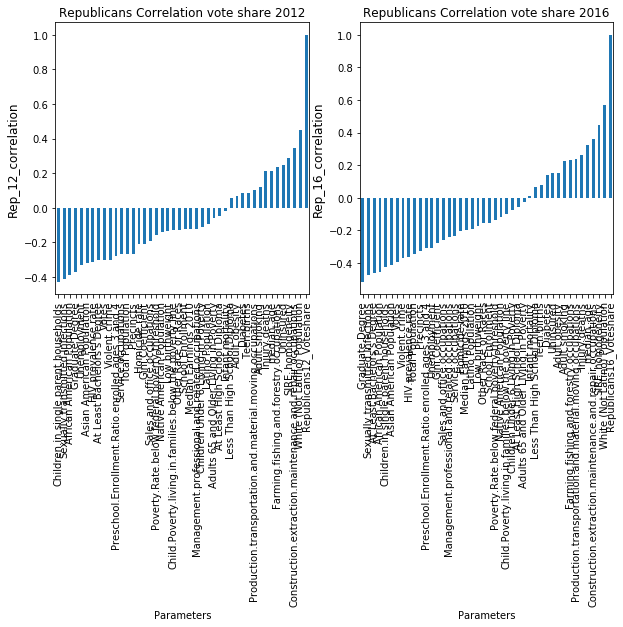

In [34]:
# I'm plotting it side by side to check for changes in the highest correlations
plt.subplots(1, 2, figsize = (10,5))

plt.subplot(1,2,1)

corr12['Rep_12_corr'].plot.bar(rot=90)
plt.ylabel('Rep_12_correlation', size=12)
plt.title('Republicans Correlation vote share 2012')


plt.subplot(1,2,2)

corr16['Rep_16_corr'].plot.bar(rot=90)
plt.ylabel('Rep_16_correlation', size=12)
plt.title('Republicans Correlation vote share 2016')


plt.tight_layout() # makes sure there is no overlap in plots 

plt.show()


This is where I was at when presented with a better visualization idea based on Govind’s morning kick of. It is not easy to see the name of the columns; I would have inverted the axes I guess. But went straight into a "classier" plotting

### Approach 2 using a heatmap 
Starting over

#I'll still approach by setting 2 different data frames, but I'll name them differently so that any changer that are made do not affect my first approach, as I think it is interesting to maintain the first approach in the workbook

In [35]:
#dropping columns that I don't want to check for correlation for 2012 republicans votes
RepShare16 = mydf.drop(columns=['Democrats_12','Republicans_12','Republicans_16', 'Democrats_16', 
                               'Democrats12_Voteshare','Democrats16_Voteshare','Republicans12_Voteshare'])

In [36]:
#dropping columns that I don't want to check for correlation for 2016 republicans votes
RepShare12 = mydf.drop(columns=['Democrats_12','Republicans_12','Republicans_16', 'Democrats_16', 
                               'Democrats12_Voteshare','Democrats16_Voteshare','Republicans16_Voteshare'])

In [37]:
corr12_1 = RepShare12.corr()
# this returns all correlations for the filtered columns

In [38]:
corr16_1 = RepShare16.corr()

# this returns all correlations for the filtered columns

I'm only interested in the correlation of votes to all other columns, so to make my view easier I can get just the column out of this

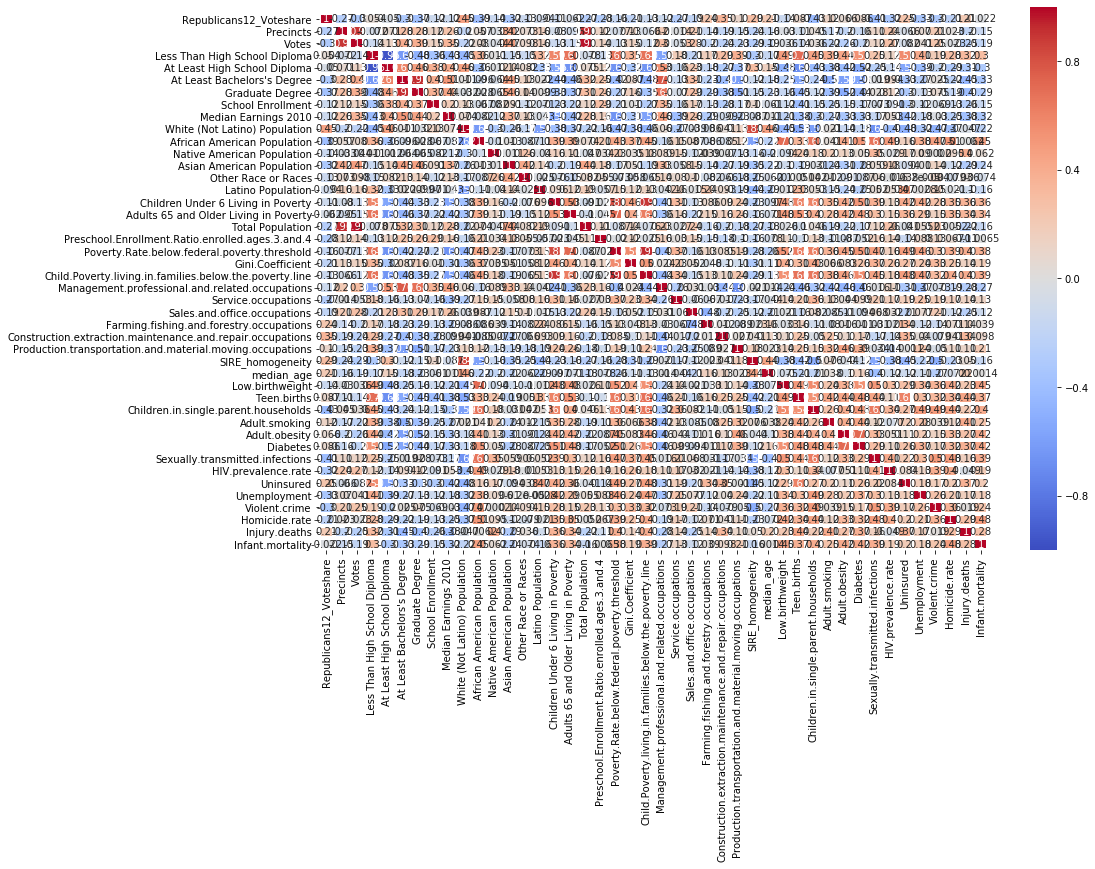

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(corr12_1,cmap='coolwarm', center=0,annot=True, linewidths=3, vmin=-1, vmax=1)
# Don't worry about this, work-around for matplotlib issue where top
plt.ylim(len(corr12_1.columns),-0.5, -0.5)
plt.show()

In [40]:
#First we create a matrix of zeroes that we will use like a mask to place over the upper triangle of our heatmap
mask = np.zeros_like(corr12_1, dtype=np.bool)

# np.triu_indices_from returns the upper triangle, which we are setting to True
mask[np.triu_indices_from(mask)] = True

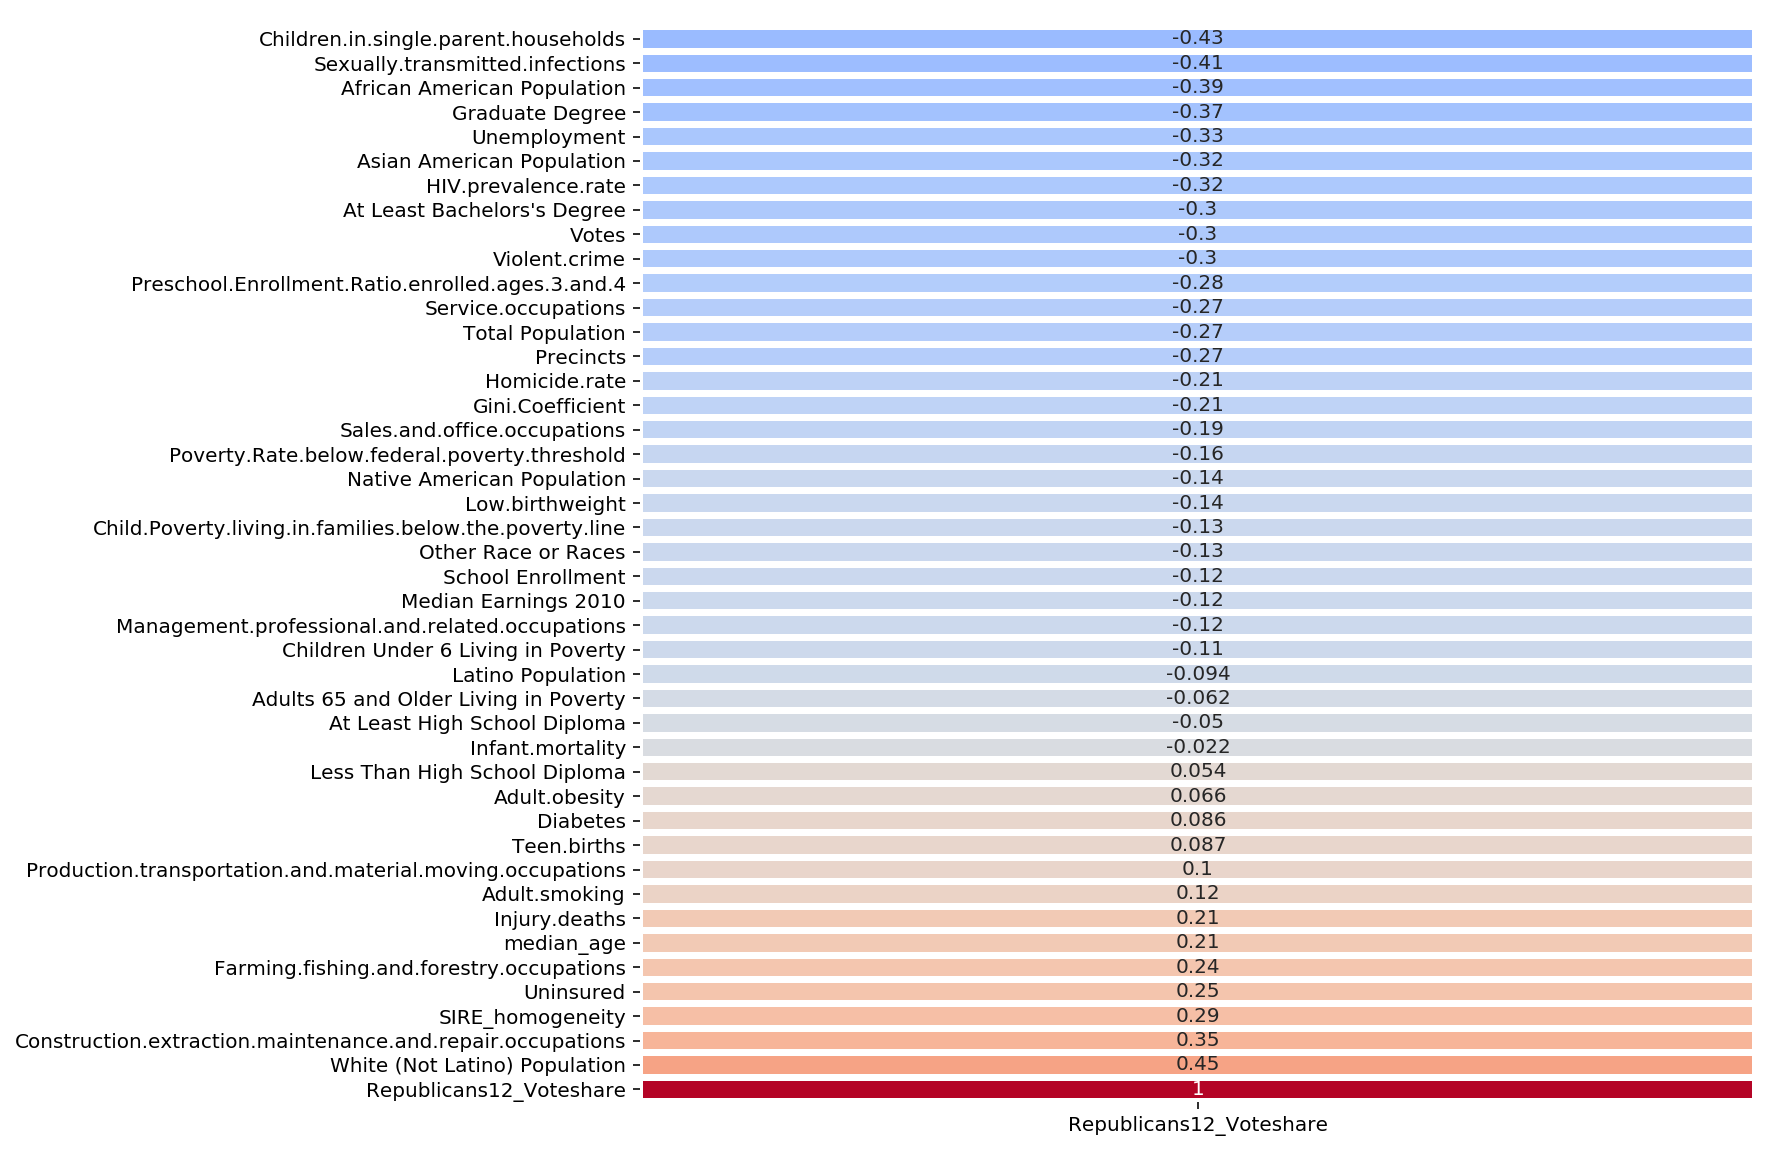

In [41]:
%config InlineBackend.figure_format ='retina'
plt.figure(figsize=(10,10))
sns.heatmap(corr12_1[['Republicans12_Voteshare']].sort_values(by='Republicans12_Voteshare'), cbar = False ,cmap='coolwarm', center=0, annot=True, linewidths = 3)
plt.ylim(len(corr12_1.columns),-0.5, -0.5)
plt.show()

Now this method outputs a much cleaner plot and I decided to continue with it, but I want to combine both election plots side by side

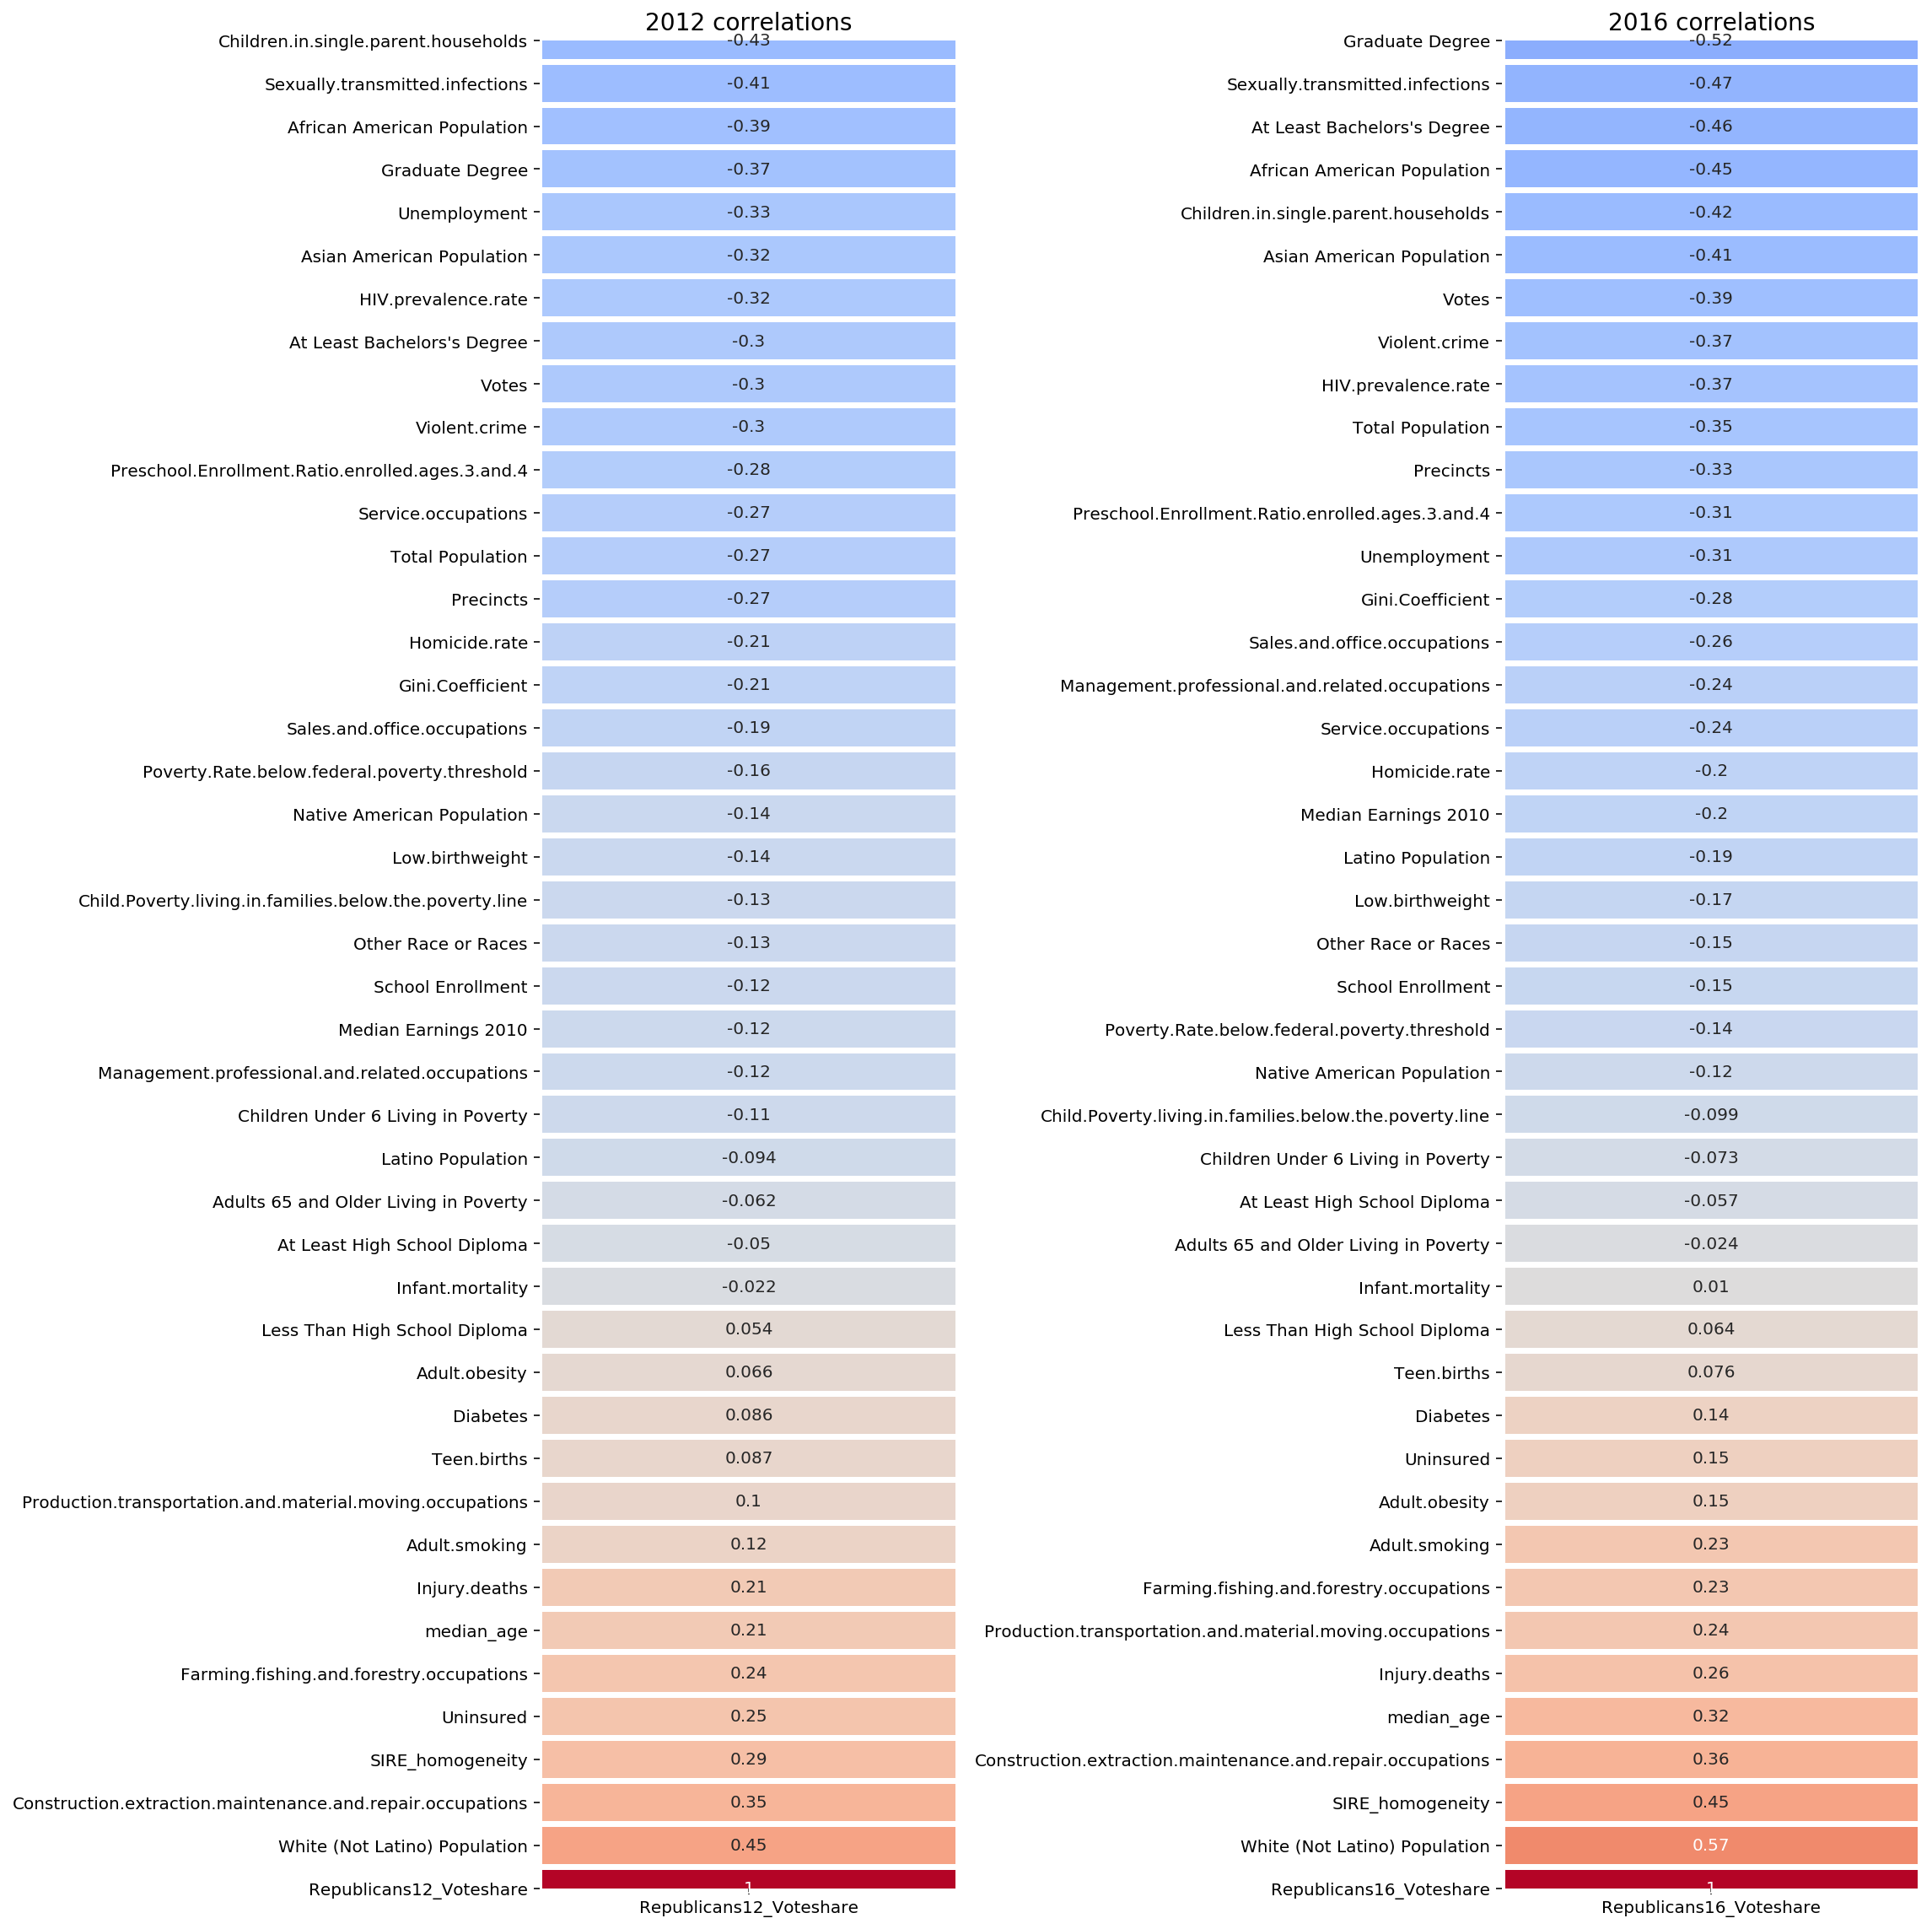

In [42]:
# I'm plotting it side by side to check for changes in the highest correlations
plt.subplots(1, 2, figsize = (16,16)) # - Sets a subplot with 2 columns and 1 row
plt.ylim(len(corr12_1.columns),-0.9, -0.9)


plt.subplot(1,2,1) #- set the position of the first subplot


sns.heatmap(corr12_1[['Republicans12_Voteshare']].sort_values(by='Republicans12_Voteshare'),cbar = False, cmap='coolwarm', center=0, annot=True, linewidths = 3)
plt.title('2012 correlations', size=14)
#I used the cbar = False to remove the temperature bar and give more room the information that actually matters

plt.subplot(1,2,2) # -  #- set the position of the second subplot

sns.heatmap(corr16_1[['Republicans16_Voteshare']].sort_values(by='Republicans16_Voteshare'),cbar = False, cmap='coolwarm', center=0, annot=True, linewidths = 3)
plt.title('2016 correlations', size = 14)
plt.tight_layout() # makes sure there is no overlap in plots 

plt.show()

By plotting each election separately I was able to keep each plot ordered on its own, that also helps me visualise how each aspect of the data file gained or lost correlation to the republicans vote share from one election to the other.
For both plots I have to ignore the Republicans vote share, as it is relating to itself and for now, I haven't figured how to ignore or mask it. 



####  Q1 - Which data columns are correlated with the Republican vote share? Which columns are not? Does this pattern appear in both elections?

From the plot above we can consider the extremes of each bar as the most correlation to the votes, negatives are a negative correlation, but still a correlation. Overall the closer to 0 the least correlation there is. 

Education and Race have a good affect on them. The median age as well. and even the construction.maintenence occupations have a good correlation to the Republicans vote share. 

Infant mortality, diabetes, population over 65 living in poverty don't really have a big correlation. It would be interesting to check how many people over 65 actually vote and if that trend to gain more relevance on the correlation as the population gets older. 

This could be a Bias of the data set. It's harder for poor population to get to voting locations, this may have effect on the relevancy of this population vote. 

I can combine both to just compare if there is any difference from one election to another, or in other words, if any of the influencing aspects gained or lost relevance from one election to the other. 

In [43]:
#I chose the concat method ad seem on Pandas documentation:
# - https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
diff = pd.concat([corr12, corr16], axis=1, ignore_index=True, sort=False)

In [44]:
diff.reset_index()

index         0         1
0                Children.in.single.parent.households -0.428315 -0.423869
1                     Sexually.transmitted.infections -0.410198 -0.472257
2                         African American Population -0.386982 -0.452888
3                                     Graduate Degree -0.369040 -0.515317
4                                        Unemployment -0.331446 -0.305478
5                           Asian American Population -0.318204 -0.411752
6                                 HIV.prevalence.rate -0.316011 -0.365212
7                         At Least Bachelors's Degree -0.303588 -0.463351
8                                               Votes -0.301207 -0.392884
9                                       Violent.crime -0.299644 -0.368599
10   Preschool.Enrollment.Ratio.enrolled.ages.3.and.4 -0.276838 -0.310874
11                                Service.occupations -0.270041 -0.235142
12                                   Total Population -0.267314 -0.346634
13                                          Precincts -0.265512 -0.327960
14                                      Homicide.rate -0.211807 -0.202222
15                                   Gini.Coefficient -0.208500 -0.275720
16                       Sales.and.office.occupations -0.191835 -0.259452
17       Poverty.Rate.below.federal.poverty.threshold -0.158990 -0.138462
18                         Native American Population -0.137604 -0.115751
19                                    Low.birthweight -0.136189 -0.170071
20  Child.Poverty.living.in.families.below.the.pov... -0.129795 -0.099417
21                                Other Race or Races -0.127281 -0.154596
22                                  School Enrollment -0.122559 -0.153327
23                               Median Earnings 2010 -0.120963 -0.198063
24    Management.professional.and.related.occupations -0.120200 -0.238566
25                 Children Under 6 Living in Poverty -0.111386 -0.073420
26                                  Latino Population -0.093655 -0.192275
27              Adults 65 and Older Living in Poverty -0.062219 -0.023872
28                       At Least High School Diploma -0.050159 -0.057151
29                                   Infant.mortality -0.021540  0.010197
30                      Less Than High School Diploma  0.053574  0.064357
31                                      Adult.obesity  0.065877  0.154928
32                                           Diabetes  0.085808  0.141068
33                                        Teen.births  0.086914  0.075652
34  Production.transportation.and.material.moving....  0.100232  0.235076
35                                      Adult.smoking  0.121408  0.226113
36                                      Injury.deaths  0.210395  0.263604
37                                         median_age  0.211114  0.322075
38           Farming.fishing.and.forestry.occupations  0.236098  0.232390
39                                          Uninsured  0.245395  0.150675
40                                   SIRE_homogeneity  0.290022  0.448294
41  Construction.extraction.maintenance.and.repair...  0.345431  0.363151
42                      White (Not Latino) Population  0.449336  0.568750
43                            Republicans12_Voteshare  1.000000       NaN
44                            Republicans16_Voteshare       NaN  1.000000

In [45]:
#fix column names

diff.reset_index()
diff.columns = ['Rep_12_share','Rep_16_share']
diff.head()

Rep_12_share  Rep_16_share
Children.in.single.parent.households     -0.428315     -0.423869
Sexually.transmitted.infections          -0.410198     -0.472257
African American Population              -0.386982     -0.452888
Graduate Degree                          -0.369040     -0.515317
Unemployment                             -0.331446     -0.305478

In [46]:
# I can even set a new column with the variation from one election to another

diff['Variation']=diff['Rep_16_share']-diff['Rep_12_share']
diff

Rep_12_share  \
Children.in.single.parent.households                   -0.428315   
Sexually.transmitted.infections                        -0.410198   
African American Population                            -0.386982   
Graduate Degree                                        -0.369040   
Unemployment                                           -0.331446   
Asian American Population                              -0.318204   
HIV.prevalence.rate                                    -0.316011   
At Least Bachelors's Degree                            -0.303588   
Votes                                                  -0.301207   
Violent.crime                                          -0.299644   
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4       -0.276838   
Service.occupations                                    -0.270041   
Total Population                                       -0.267314   
Precincts                                              -0.265512   
Homicide.rate                                          -0.211807   
Gini.Coefficient                                       -0.208500   
Sales.and.office.occupations                           -0.191835   
Poverty.Rate.below.federal.poverty.threshold           -0.158990   
Native American Population                             -0.137604   
Low.birthweight                                        -0.136189   
Child.Poverty.living.in.families.below.the.pove...     -0.129795   
Other Race or Races                                    -0.127281   
School Enrollment                                      -0.122559   
Median Earnings 2010                                   -0.120963   
Management.professional.and.related.occupations        -0.120200   
Children Under 6 Living in Poverty                     -0.111386   
Latino Population                                      -0.093655   
Adults 65 and Older Living in Poverty                  -0.062219   
At Least High School Diploma                           -0.050159   
Infant.mortality                                       -0.021540   
Less Than High School Diploma                           0.053574   
Adult.obesity                                           0.065877   
Diabetes                                                0.085808   
Teen.births                                             0.086914   
Production.transportation.and.material.moving.o...      0.100232   
Adult.smoking                                           0.121408   
Injury.deaths                                           0.210395   
median_age                                              0.211114   
Farming.fishing.and.forestry.occupations                0.236098   
Uninsured                                               0.245395   
SIRE_homogeneity                                        0.290022   
Construction.extraction.maintenance.and.repair....      0.345431   
White (Not Latino) Population                           0.449336   
Republicans12_Voteshare                                 1.000000   
Republicans16_Voteshare                                      NaN   

                                                    Rep_16_share  Variation  
Children.in.single.parent.households                   -0.423869   0.004446  
Sexually.transmitted.infections                        -0.472257  -0.062059  
African American Population                            -0.452888  -0.065906  
Graduate Degree                                        -0.515317  -0.146278  
Unemployment                                           -0.305478   0.025969  
Asian American Population                              -0.411752  -0.093548  
HIV.prevalence.rate                                    -0.365212  -0.049200  
At Least Bachelors's Degree                            -0.463351  -0.159763  
Votes                                                  -0.392884  -0.091677  
Violent.crime                                          -0.368599  -0.068955  
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4       -0.310874 

Now I can plot the diferrences and check what gainned more relevance in the correlations

In [47]:
# I'll sort it to make easier to see what changged the most
diff = diff.sort_values(by=['Variation'])

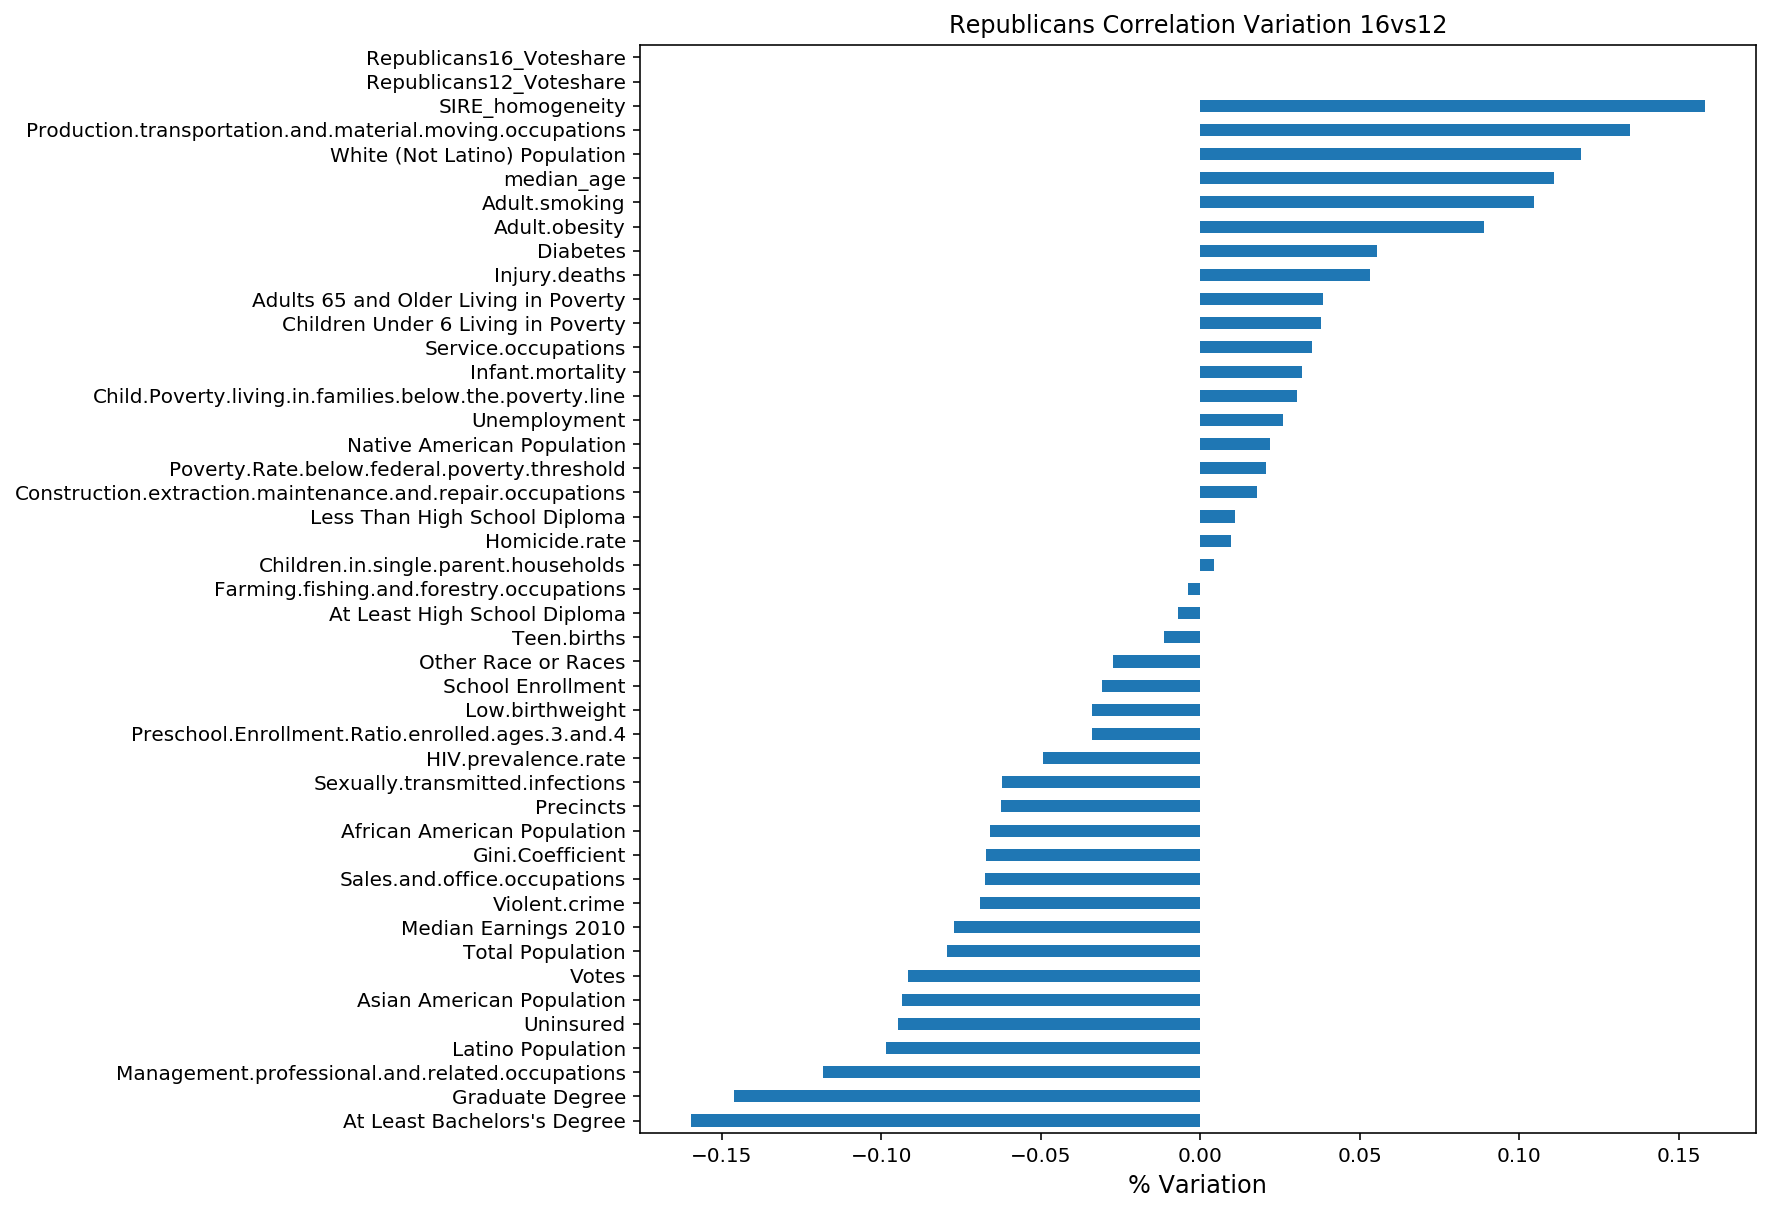

In [48]:
plt.figure(figsize = (10,10))
diff['Variation'].plot.barh(y = 'Variation')
plt.xlabel('% Variation', size=12)
plt.title('Republicans Correlation Variation 16vs12')
plt.show()

#we can just ignore the first two columns in this case.
#not super clean, but enough to understand the variation from one election to the other. 

From this we can see that the larger the bar the more correlation a column gained (positive or negative)
The higher education seems to have become more relevant to republicans vote share, as well as the negative influence of Latino population and Asian American population.
White population and median age also increased their correlation positively to the republicans vote share.
However, It is still necessary to check if these categories are overall relevant.
Since overall the difference from one election to the other is close enough to zero I can test the hypothesis that the difference is 0 and check how far away from it I am at this point.


Hypothesis Test:

<center> $H_0$: $\mu_{diff} = 0$ $\;\; vs \;\;$  $H_1$: $\mu_{diff} \neq 0$ </center>


Assuming that for both elections we are looking at the same territories, counties and Fips we can say that the sample is basically the same population.


 Q1 - Last part
 ### Are these correlations statistically significant?

In [49]:
#I will reset my original df to run a solution found on line. 

# Basically just dropping float columns that I know logically dont belong in the model
#The less columns, less things can influence the model
mydf = mydf.drop(['Democrats_12', 'Republicans_12', 'Republicans_16', 'Democrats_16', 
          'Democrats12_Voteshare', 'Democrats16_Voteshare'], axis=1)

# Votes will always relate to votes from previous year or other party.
# So I'm dropping them to reduce the influence on ttest and leaving just the republicans vote share in the df

In [50]:
# My initial approach was to look at each P  Value - That would be very time consuming, so I enventually found another suggestion

def pvalues(DataFrame):
    
    DataFrame = DataFrame._get_numeric_data()  # une only numeric data, no objects here
    
    DataFramecol = pd.DataFrame(columns=DataFrame.columns)  # Getting the DataFrame columns name
    
    pvalues = DataFramecol.transpose().join(DataFramecol, how='outer') # Transposing the columns
    
    for r in DataFrame.columns:  # Iterating the columns
        
        for c in DataFrame.columns:
            # calculating the P-Value for each combination of columns ( as a DataFrame ) by 4 decimalpointstest
            pvalues[r][c] = round(stats.pearsonr(DataFrame[r], DataFrame[c])[1], 5) 
   
    return pvalues

# specify columns I am comparing
my_pvalues = pvalues(mydf)
my_pvalues[['Republicans16_Voteshare', 'Republicans12_Voteshare']]

# this came mostly from topic number 12 in this link - https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/

Republicans16_Voteshare  \
Republicans12_Voteshare                                                  0   
Republicans16_Voteshare                                                  0   
Precincts                                                                0   
Votes                                                                    0   
Less Than High School Diploma                                      0.00031   
At Least High School Diploma                                       0.00135   
At Least Bachelors's Degree                                              0   
Graduate Degree                                                          0   
School Enrollment                                                        0   
Median Earnings 2010                                                     0   
White (Not Latino) Population                                            0   
African American Population                                              0   
Native American Population                                               0   
Asian American Population                                                0   
Other Race or Races                                                      0   
Latino Population                                                        0   
Children Under 6 Living in Poverty                                   4e-05   
Adults 65 and Older Living in Poverty                              0.18104   
Total Population                                                         0   
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4                         0   
Poverty.Rate.below.federal.poverty.threshold                             0   
Gini.Coefficient                                                         0   
Child.Poverty.living.in.families.below.the.pove...                       0   
Management.professional.and.related.occupations                          0   
Service.occupations                                                      0   
Sales.and.office.occupations                                             0   
Farming.fishing.and.forestry.occupations                                 0   
Construction.extraction.maintenance.and.repair....                       0   
Production.transportation.and.material.moving.o...                       0   
SIRE_homogeneity                                                         0   
median_age                                                               0   
Low.birthweight                                                          0   
Teen.births                                                          2e-05   
Children.in.single.parent.households                                     0   
Adult.smoking                                                            0   
Adult.obesity                                                            0   
Diabetes                                                                 0   
Sexually.transmitted.infections                                          0   
HIV.prevalence.rate                                                      0   
Uninsured                                                                0   
Unemployment                                                             0   
Violent.crime                                                            0   
Homicide.rate                                                            0   
Injury.deaths                                                            0   
Infant.mortality                                                   0.56781   

                                                   Republicans12_Voteshare  
Republicans12_Voteshare                                                  0  
Republicans16_Voteshare                                                  0  
Precincts                                                                0  
Votes                                                                    0  
Less Than High School Diploma                                      0.00267  


From the P value list we can say that any rows with T test value different from 0 has little statistical relevance and can be dropped.  

I will not drop the adult obesity, as it had relevance in 2012 and lost in 2016.

I'm still keeping the columns that have statiscal relevance for one of the elections only, I will decide how to treat these when fitting my model, possibly will also be drooped. tbd

In [51]:
dfclean = mydf.drop(['Infant.mortality', 'Adults 65 and Older Living in Poverty','At Least High School Diploma', 'Less Than High School Diploma'] , axis =1)

In [52]:
dfclean.head()

Fips  Republicans12_Voteshare  Republicans16_Voteshare     State  ST  \
0   5043                 0.596440                 0.626599  Arkansas  AR   
1   5087                 0.670072                 0.755996  Arkansas  AR   
2  13159                 0.691523                 0.738172   Georgia  GA   
3   8037                 0.423862                 0.391877  Colorado  CO   
4  13091                 0.681034                 0.732244   Georgia  GA   

                     County  Precincts    Votes  At Least Bachelors's Degree  \
0     Drew County, Arkansas       17.0   6590.0                         19.4   
1  Madison County, Arkansas       20.0   6829.0                         13.4   
2    Jasper County, Georgia        3.0   6016.0                         13.3   
3    Eagle County, Colorado       30.0  22611.0                         45.9   
4     Dodge County, Georgia       16.0   6995.0                         13.8   

   Graduate Degree  School Enrollment  Median Earnings 2010  \
0              5.7               78.5          21988.947300   
1              4.1               76.4          23365.948890   
2              5.6               70.2          25363.060950   
3             11.7               64.1          35484.543175   
4              4.8               61.5          26927.608255   

   White (Not Latino) Population  African American Population  \
0                          67.90                        27.95   
1                          92.00                         0.25   
2                          72.70                        22.20   
3                          68.40                         0.30   
4                          66.15                        29.80   

   Native American Population  Asian American Population  Other Race or Races  \
0                        0.15                       0.55                 0.85   
1                        1.25                       0.30                 1.50   
2                        0.40                       0.10                 1.05   
3                        0.25                       1.15                 1.10   
4                        0.15                       0.45                 0.65   

   Latino Population  Children Under 6 Living in Poverty  Total Population  \
0               2.65                               34.15             18604   
1               4.70                               26.20             15597   
2               3.55                               17.60             13744   
3              28.90                               11.65             51405   
4               2.80                               20.65             20745   

   Preschool.Enrollment.Ratio.enrolled.ages.3.and.4  \
0                                              73.5   
1                                              43.8   
2                                              36.5   
3                                              50.7   
4                                              41.5   

   Poverty.Rate.below.federal.poverty.threshold  Gini.Coefficient  \
0                                         23.45             0.469   
1                                         18.20             0.446   
2                                         18.05             0.451   
3                                          9.40             0.464   
4                                         21.15             0.464   

   Child.Poverty.living.in.families.below.the.poverty.line  \
0                                              36.95         
1                                              25.15         
2                                              27.60         
3                                              12.05         
4                                              23.70         

   Management.professional.and.related.occupations  Service.occupations  \
0                                            28.35                18.25   
1                                            25.15                16.85

### Q. 2 
Conduct a statistical test to see whether the mean Republican party vote share across all of the counties are different between the 2 elections. Which statistical test is appropriate here? Describe why you’ve chosen your test and interpret your results. Assume that the people who voted in each county are a representative sample of its population.

## A: 
Considering that for both elections we have the same counties and that its voters are a representative sample of the population, so basicaly the same population and two different results collected at different moments, we can use use the paired sample t-test. 

### Null Hypothesis = Mean difference across all counties between elections is equal to 0
### Alternitive = there is some diference in mean of votes across all counties between elections

So to answer this I need to check the republican vote share for each election and how it relates to each variable

for this section I relied on extra reading from here: https://pythonfordatascience.org/paired-samples-t-test-python/

In [53]:
dfclean.head()

Fips  Republicans12_Voteshare  Republicans16_Voteshare     State  ST  \
0   5043                 0.596440                 0.626599  Arkansas  AR   
1   5087                 0.670072                 0.755996  Arkansas  AR   
2  13159                 0.691523                 0.738172   Georgia  GA   
3   8037                 0.423862                 0.391877  Colorado  CO   
4  13091                 0.681034                 0.732244   Georgia  GA   

                     County  Precincts    Votes  At Least Bachelors's Degree  \
0     Drew County, Arkansas       17.0   6590.0                         19.4   
1  Madison County, Arkansas       20.0   6829.0                         13.4   
2    Jasper County, Georgia        3.0   6016.0                         13.3   
3    Eagle County, Colorado       30.0  22611.0                         45.9   
4     Dodge County, Georgia       16.0   6995.0                         13.8   

   Graduate Degree  School Enrollment  Median Earnings 2010  \
0              5.7               78.5          21988.947300   
1              4.1               76.4          23365.948890   
2              5.6               70.2          25363.060950   
3             11.7               64.1          35484.543175   
4              4.8               61.5          26927.608255   

   White (Not Latino) Population  African American Population  \
0                          67.90                        27.95   
1                          92.00                         0.25   
2                          72.70                        22.20   
3                          68.40                         0.30   
4                          66.15                        29.80   

   Native American Population  Asian American Population  Other Race or Races  \
0                        0.15                       0.55                 0.85   
1                        1.25                       0.30                 1.50   
2                        0.40                       0.10                 1.05   
3                        0.25                       1.15                 1.10   
4                        0.15                       0.45                 0.65   

   Latino Population  Children Under 6 Living in Poverty  Total Population  \
0               2.65                               34.15             18604   
1               4.70                               26.20             15597   
2               3.55                               17.60             13744   
3              28.90                               11.65             51405   
4               2.80                               20.65             20745   

   Preschool.Enrollment.Ratio.enrolled.ages.3.and.4  \
0                                              73.5   
1                                              43.8   
2                                              36.5   
3                                              50.7   
4                                              41.5   

   Poverty.Rate.below.federal.poverty.threshold  Gini.Coefficient  \
0                                         23.45             0.469   
1                                         18.20             0.446   
2                                         18.05             0.451   
3                                          9.40             0.464   
4                                         21.15             0.464   

   Child.Poverty.living.in.families.below.the.poverty.line  \
0                                              36.95         
1                                              25.15         
2                                              27.60         
3                                              12.05         
4                                              23.70         

   Management.professional.and.related.occupations  Service.occupations  \
0                                            28.35                18.25   
1                                            25.15                16.85

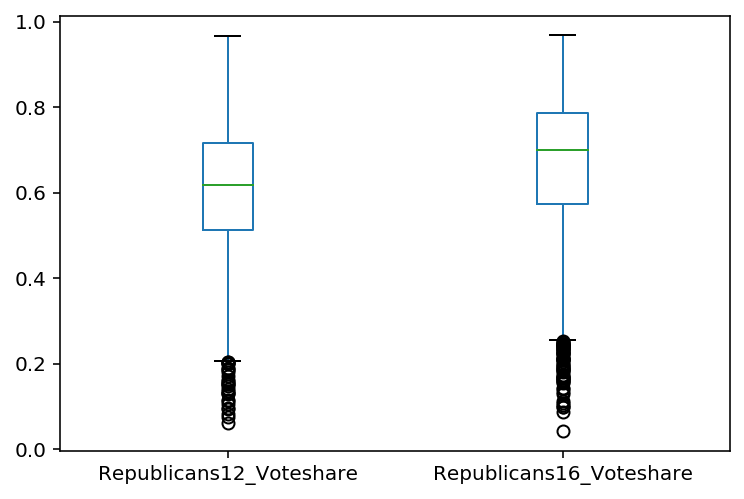

In [54]:
#First check for significant outliers

dfclean[['Republicans12_Voteshare', 'Republicans16_Voteshare']].plot(kind='box')

# The two outliers are just the relation from each voteshare to itself 


The vote share has some ouliers on the botton section. I might want to clear that 

In [55]:
# I also want to check for a normal distrubution 

diff.head()

Rep_12_share  Rep_16_share  \
At Least Bachelors's Degree                         -0.303588     -0.463351   
Graduate Degree                                     -0.369040     -0.515317   
Management.professional.and.related.occupations     -0.120200     -0.238566   
Latino Population                                   -0.093655     -0.192275   
Uninsured                                            0.245395      0.150675   

                                                 Variation  
At Least Bachelors's Degree                      -0.159763  
Graduate Degree                                  -0.146278  
Management.professional.and.related.occupations  -0.118366  
Latino Population                                -0.098620  
Uninsured                                        -0.094720

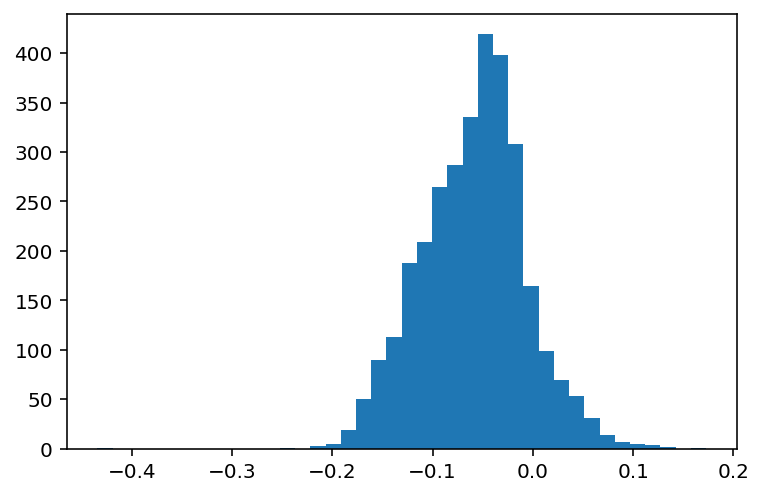

In [56]:
# I want to check with the variation in republicans vote share is distributed thru the elections.

plt.figure()
plt.hist((dfclean['Republicans12_Voteshare']-dfclean['Republicans16_Voteshare']),bins=40)
plt.show()

#seems that diference is well distributed, but not centered close to 0.

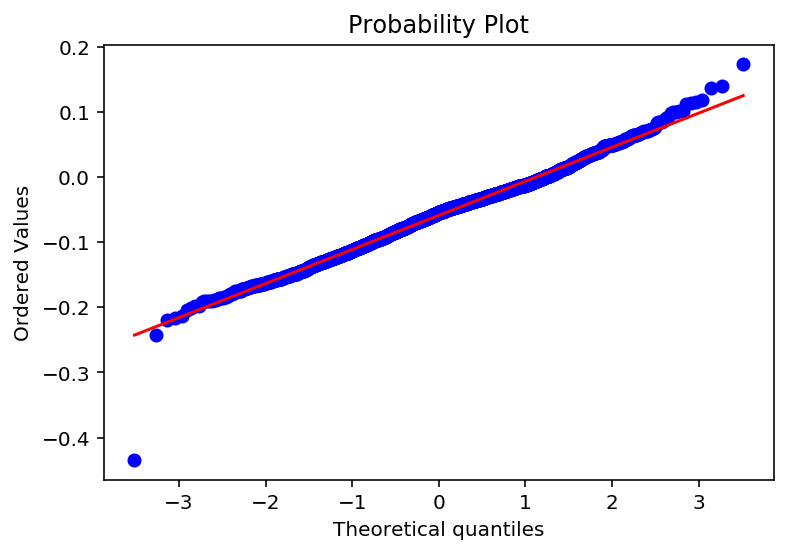

In [57]:
# the next step is to check the variation against a QQ plot

stats.probplot((dfclean['Republicans12_Voteshare']-dfclean['Republicans16_Voteshare']), dist="norm", plot = plt);
plt.show();

 I already expected some outliers on each end, but over all qq plot for normal distribution seems ok
 Possibly by cleaning some columns the tail of the graph will improve
 

In [58]:
# I can now check the Shapiro test for normality significance
stats.shapiro((dfclean['Republicans12_Voteshare']-dfclean['Republicans16_Voteshare']))

(0.9924368262290955, 8.616611764378224e-12)

The output for the Shapiro test shows a P value (Float, p-value) very close to zero.
Consindering my alpha level as 0.05 this shows that the null hypothesis (data not normally distributed) can be rejected. 
I can further investigate this, due to data size, with the Q-Qtest

In [59]:
stats.ttest_rel(dfclean['Republicans12_Voteshare'], dfclean['Republicans16_Voteshare'])

Ttest_relResult(statistic=-62.952440994305775, pvalue=0.0)

The null hypothesis on the ttest is that the mean difference from one election to the other is equal to zero
The alternative  is that the  mean diference is not equal to 0.

Again with a low p value the null hypothesis can be rejected.

For this section I alse seeked some clarification here : https://pythonfordatascienceorg.wordpress.com/paired-samples-t-test-python/


## Question  3 - 

Fit a statistical model that predicts the 2016 relative vote share of the Republican party within a county using the county-level demographic data. Explain why you chose that particular model. When building your model, answer the following questions:

What are the data points? What are the independent and dependent variables?
How good is the fit of your model? What metric is a good measure to evaluate your model? Interpret your results.

In the clean dataset that I now have, and that can be even cleaner, I have multiple independent variables that affect the depedent variable Republican Vote Share. 

The outcome is pretty  much normaly distributed. 

I worry abouth the multicollinearity with data. as in etinicity will relate to each other.
One way to fix this is to consider it as categorical, so I can remove one of them and increase th

The correct approach for a model with these characteristics would be the Multiple Linear regression.

I possibly need to test this with fewer columns



### Multiple Linear Regression

I will start by further cleanning some of indepedent variables from the data set that have low correlation to the Voteshare, as seen previously. I will also use the latest election only, to reduce multicollinearity. For now I'll remove columns that had correlation from -0.2 to +0.2. 
And if necessary improve the tresh later on. 

##### Notes :  I decided not to remove native american population ratio and latino population ratio.
##### even if the correlation is low for the 2016 election I thinks it is important to keep the entire ethnicity from the the degraphic data. Also these aspects did gain relavancy from one election to the next as seem in question 1. 

In [60]:
dfclean.columns.sort_values()

Index(['Adult.obesity', 'Adult.smoking', 'African American Population',
       'Asian American Population', 'At Least Bachelors's Degree',
       'Child.Poverty.living.in.families.below.the.poverty.line',
       'Children Under 6 Living in Poverty',
       'Children.in.single.parent.households',
       'Construction.extraction.maintenance.and.repair.occupations', 'County',
       'Diabetes', 'Farming.fishing.and.forestry.occupations', 'Fips',
       'Gini.Coefficient', 'Graduate Degree', 'HIV.prevalence.rate',
       'Homicide.rate', 'Injury.deaths', 'Latino Population',
       'Low.birthweight', 'Management.professional.and.related.occupations',
       'Median Earnings 2010', 'Native American Population',
       'Other Race or Races', 'Poverty.Rate.below.federal.poverty.threshold',
       'Precincts', 'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
       'Production.transportation.and.material.moving.occupations',
       'Republicans12_Voteshare', 'Republicans16_Voteshare',
     

In [61]:
dfmodel1 = dfclean.drop(columns = ['Teen.births', 'Republicans12_Voteshare','Diabetes', 'Adult.obesity', 'Uninsured','Adult.smoking', 
'Children Under 6 Living in Poverty','School Enrollment', 'Low.birthweight'])

Now I can check for linearity between votes shares and each remaining independent variable

In [62]:
dfmodel1.head()

Fips  Republicans16_Voteshare     State  ST                    County  \
0   5043                 0.626599  Arkansas  AR     Drew County, Arkansas   
1   5087                 0.755996  Arkansas  AR  Madison County, Arkansas   
2  13159                 0.738172   Georgia  GA    Jasper County, Georgia   
3   8037                 0.391877  Colorado  CO    Eagle County, Colorado   
4  13091                 0.732244   Georgia  GA     Dodge County, Georgia   

   Precincts    Votes  At Least Bachelors's Degree  Graduate Degree  \
0       17.0   6590.0                         19.4              5.7   
1       20.0   6829.0                         13.4              4.1   
2        3.0   6016.0                         13.3              5.6   
3       30.0  22611.0                         45.9             11.7   
4       16.0   6995.0                         13.8              4.8   

   Median Earnings 2010  White (Not Latino) Population  \
0          21988.947300                          67.90   
1          23365.948890                          92.00   
2          25363.060950                          72.70   
3          35484.543175                          68.40   
4          26927.608255                          66.15   

   African American Population  Native American Population  \
0                        27.95                        0.15   
1                         0.25                        1.25   
2                        22.20                        0.40   
3                         0.30                        0.25   
4                        29.80                        0.15   

   Asian American Population  Other Race or Races  Latino Population  \
0                       0.55                 0.85               2.65   
1                       0.30                 1.50               4.70   
2                       0.10                 1.05               3.55   
3                       1.15                 1.10              28.90   
4                       0.45                 0.65               2.80   

   Total Population  Preschool.Enrollment.Ratio.enrolled.ages.3.and.4  \
0             18604                                              73.5   
1             15597                                              43.8   
2             13744                                              36.5   
3             51405                                              50.7   
4             20745                                              41.5   

   Poverty.Rate.below.federal.poverty.threshold  Gini.Coefficient  \
0                                         23.45             0.469   
1                                         18.20             0.446   
2                                         18.05             0.451   
3                                          9.40             0.464   
4                                         21.15             0.464   

   Child.Poverty.living.in.families.below.the.poverty.line  \
0                                              36.95         
1                                              25.15         
2                                              27.60         
3                                              12.05         
4                                              23.70         

   Management.professional.and.related.occupations  Service.occupations  \
0                                            28.35                18.25   
1                                            25.15                16.85   
2                                            21.60                17.15   
3                                            32.90                24.80   
4                                            26.15                20.05   

   Sales.and.office.occupations  Farming.fishing.and.forestry.occupations  \
0                         20.15                                      3.60   
1                         19.55                                      2.90   
2                         22.60                   

In [63]:
dfmodel1.columns

Index(['Fips', 'Republicans16_Voteshare', 'State', 'ST', 'County', 'Precincts',
       'Votes', 'At Least Bachelors's Degree', 'Graduate Degree',
       'Median Earnings 2010', 'White (Not Latino) Population',
       'African American Population', 'Native American Population',
       'Asian American Population', 'Other Race or Races', 'Latino Population',
       'Total Population', 'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
       'Poverty.Rate.below.federal.poverty.threshold', 'Gini.Coefficient',
       'Child.Poverty.living.in.families.below.the.poverty.line',
       'Management.professional.and.related.occupations',
       'Service.occupations', 'Sales.and.office.occupations',
       'Farming.fishing.and.forestry.occupations',
       'Construction.extraction.maintenance.and.repair.occupations',
       'Production.transportation.and.material.moving.occupations',
       'SIRE_homogeneity', 'median_age',
       'Children.in.single.parent.households',
       'Sexually.transmitt

In [64]:
# I will plot my numerical variables only. I don't waht to run a model influenced by the categorical columns
# This will also make it easier to play around, remove and add, columns to my X.

X = dfmodel1.loc[:,'Precincts':'Injury.deaths']

y = dfmodel1['Republicans16_Voteshare']

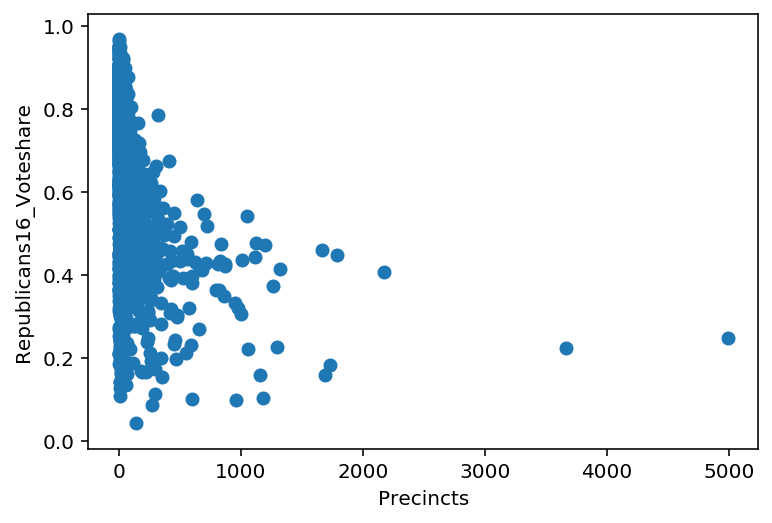

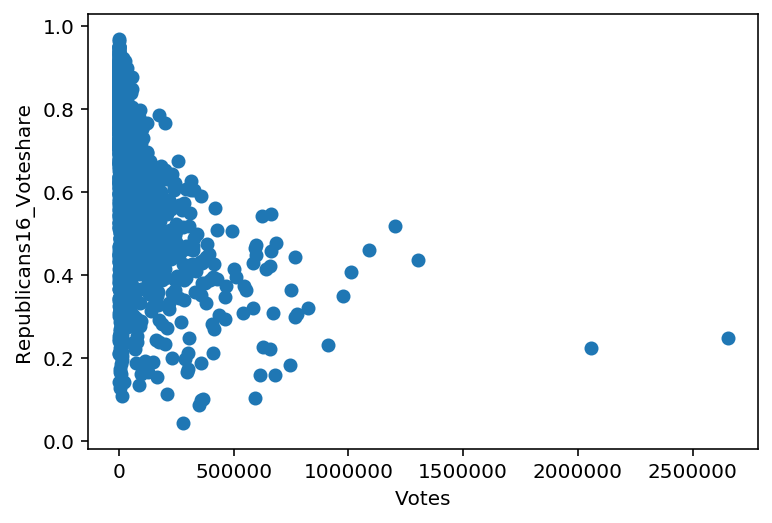

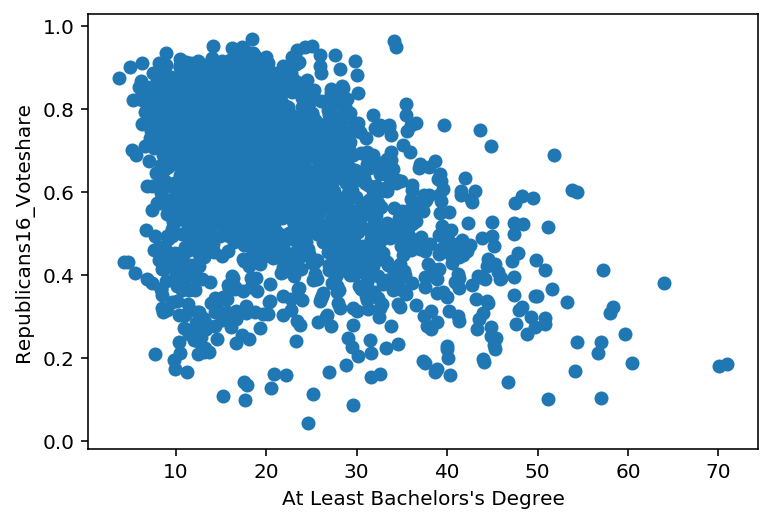

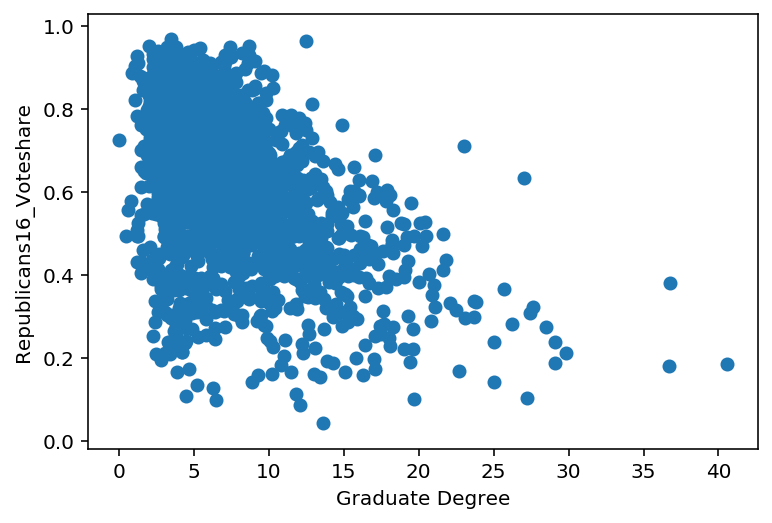

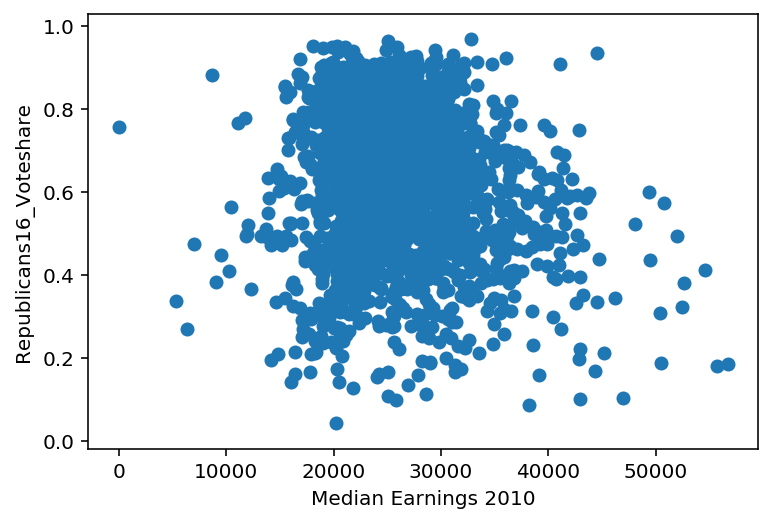

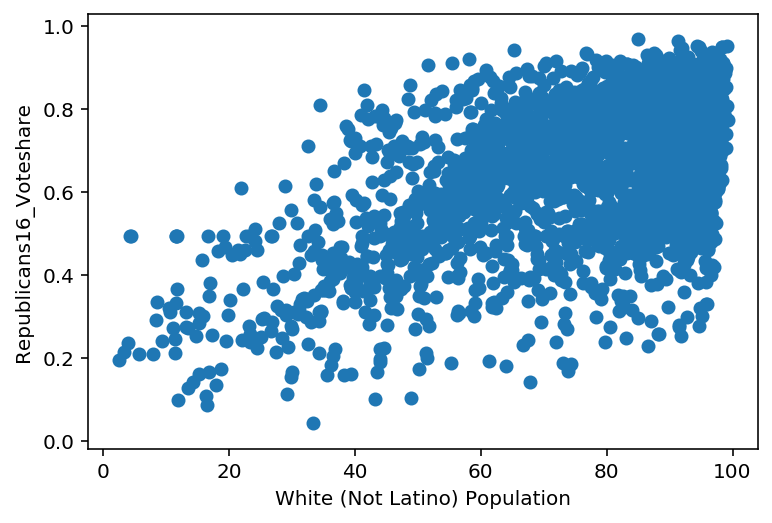

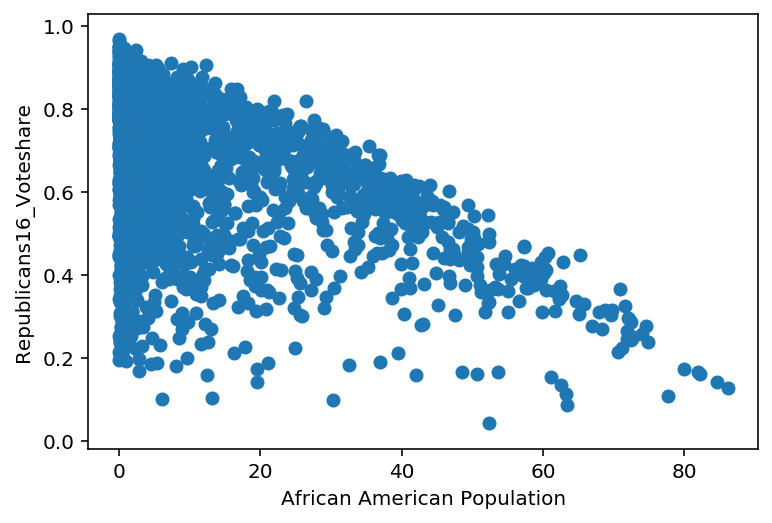

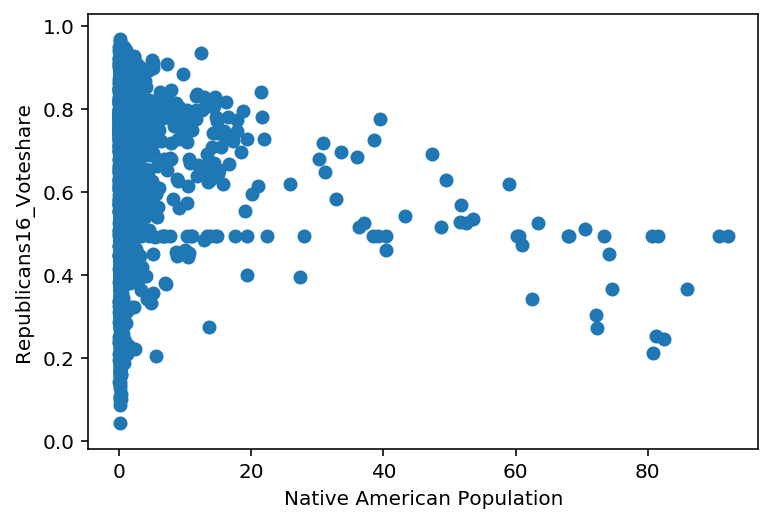

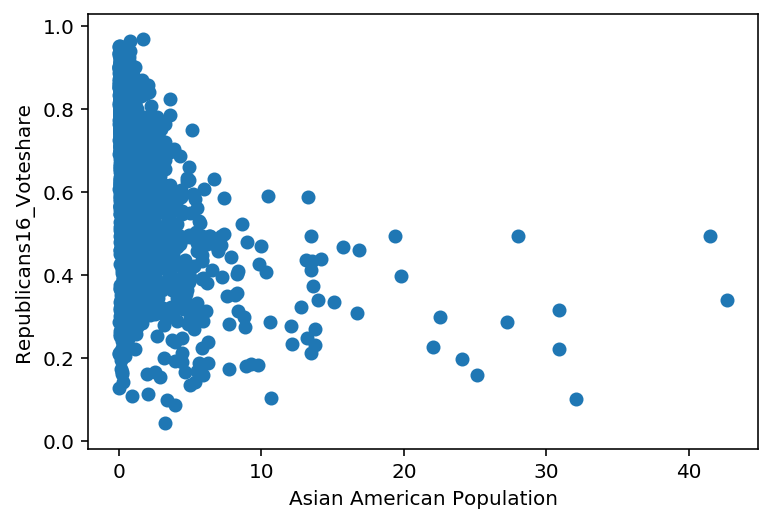

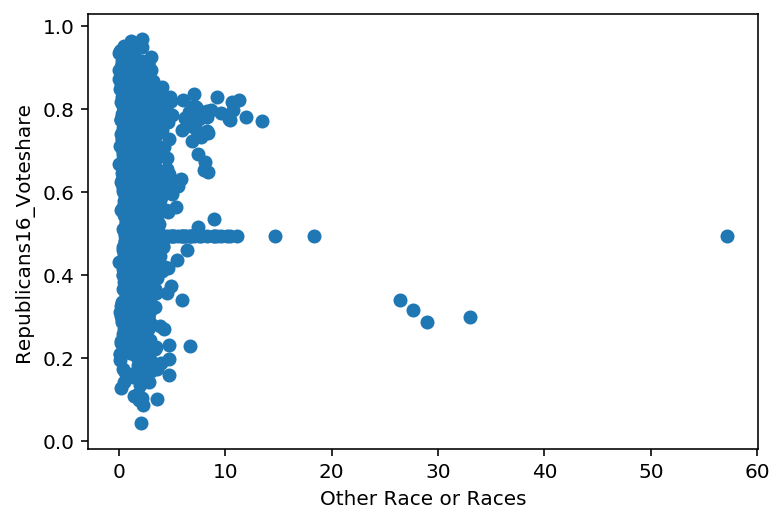

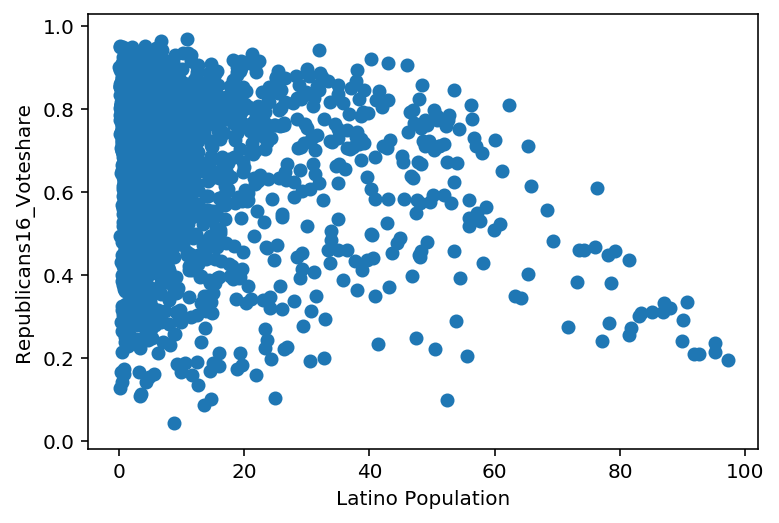

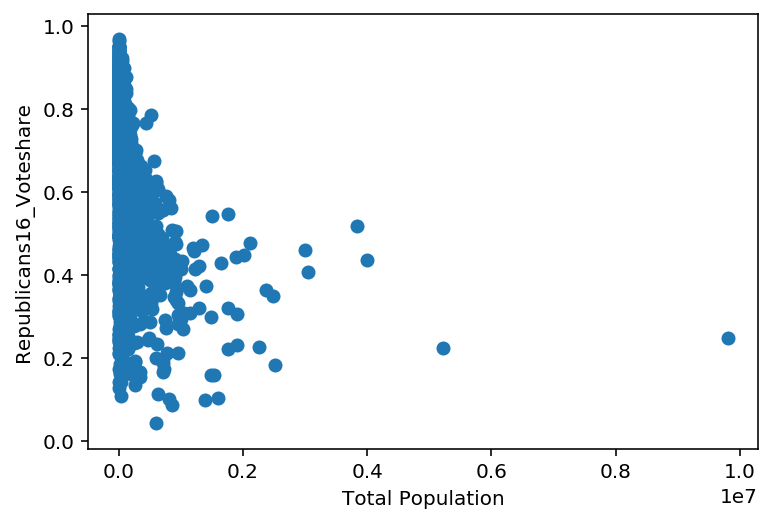

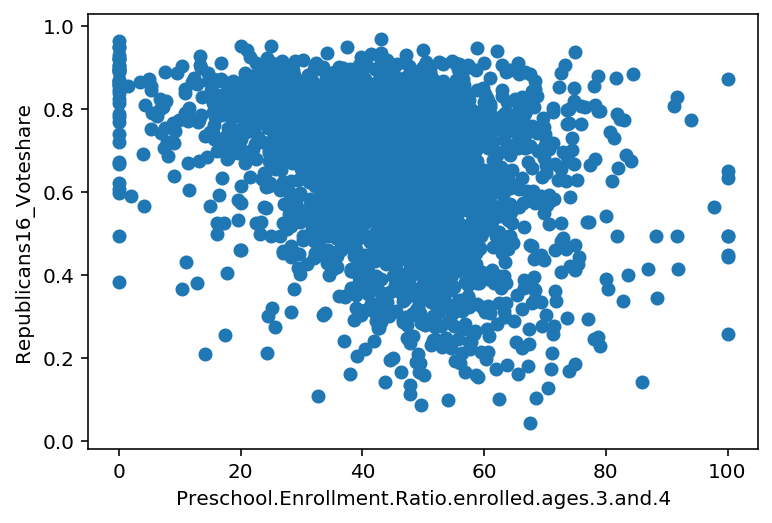

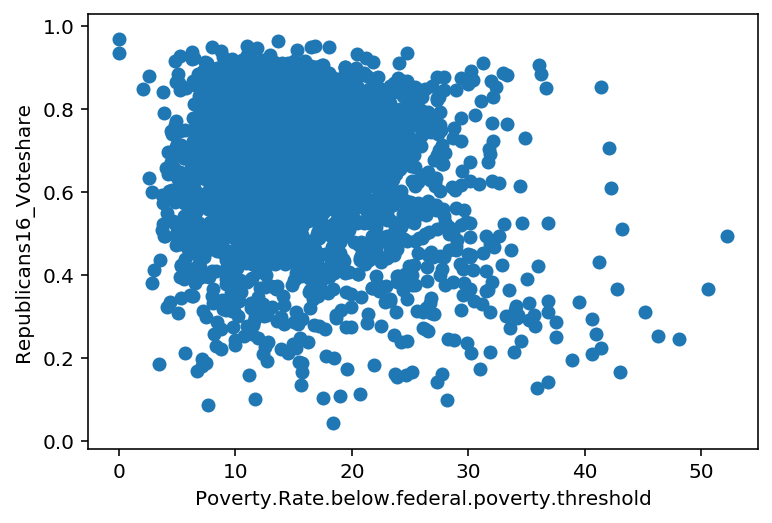

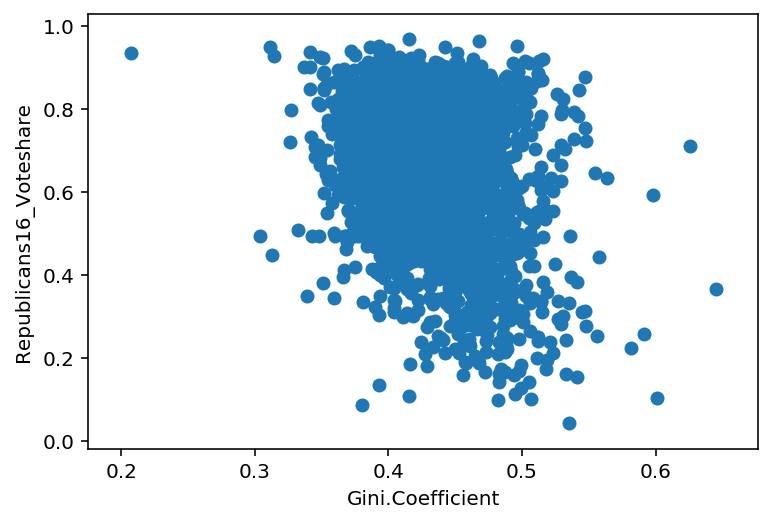

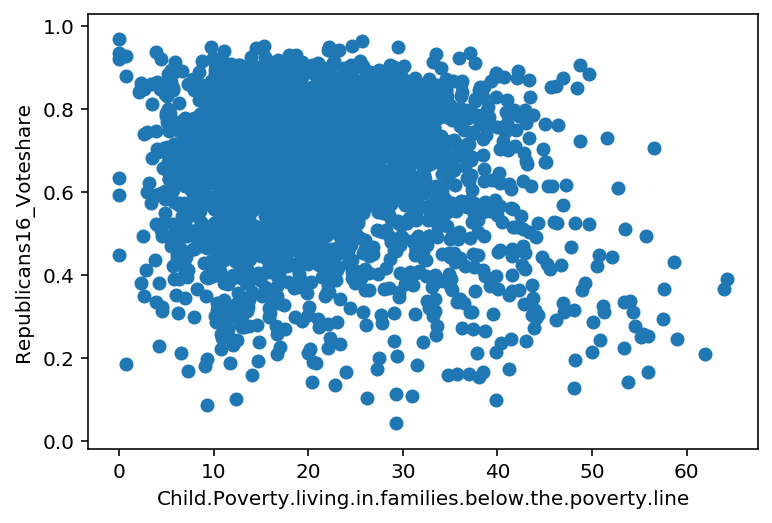

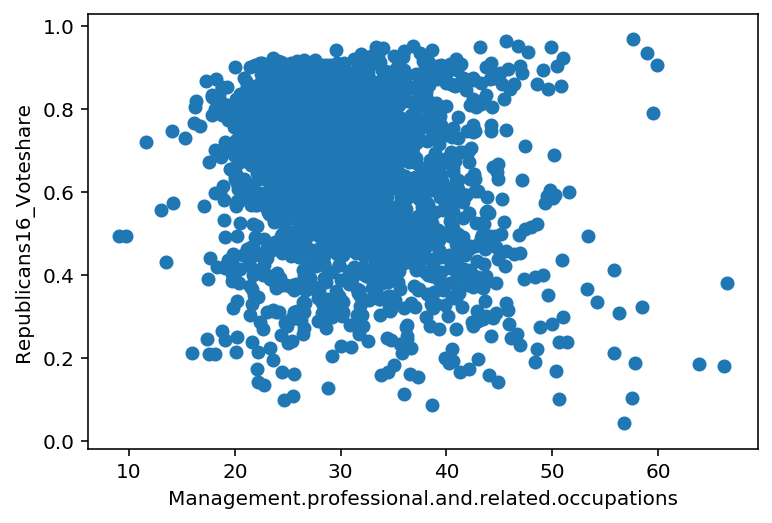

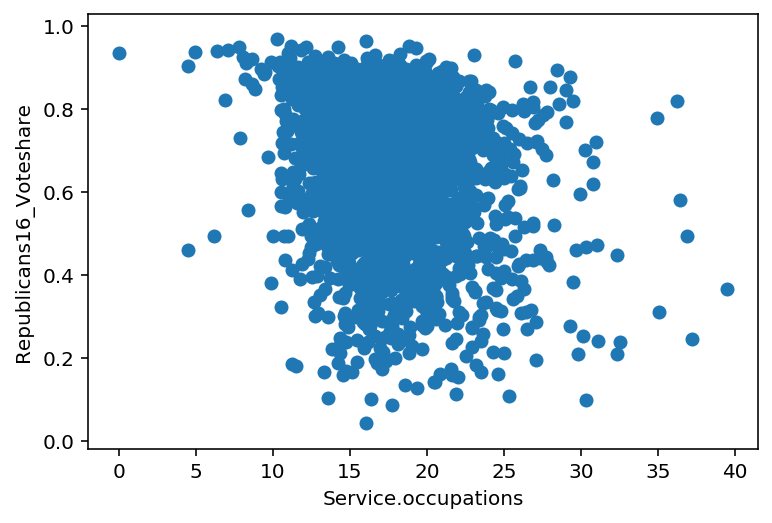

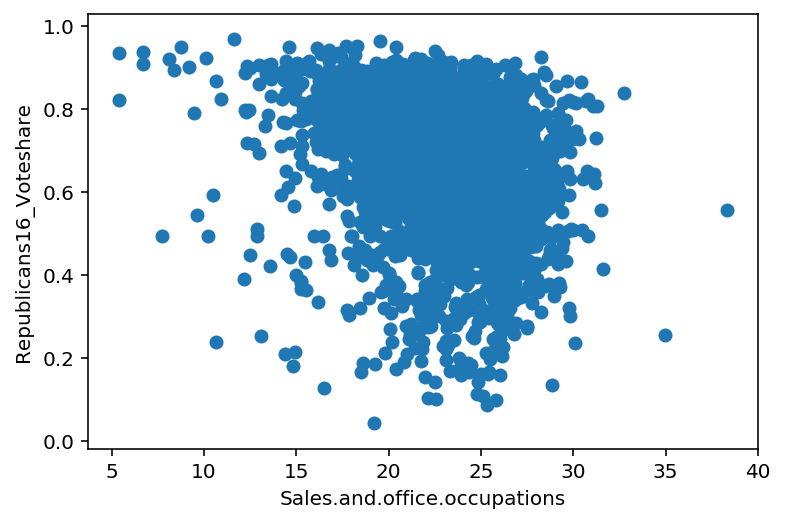

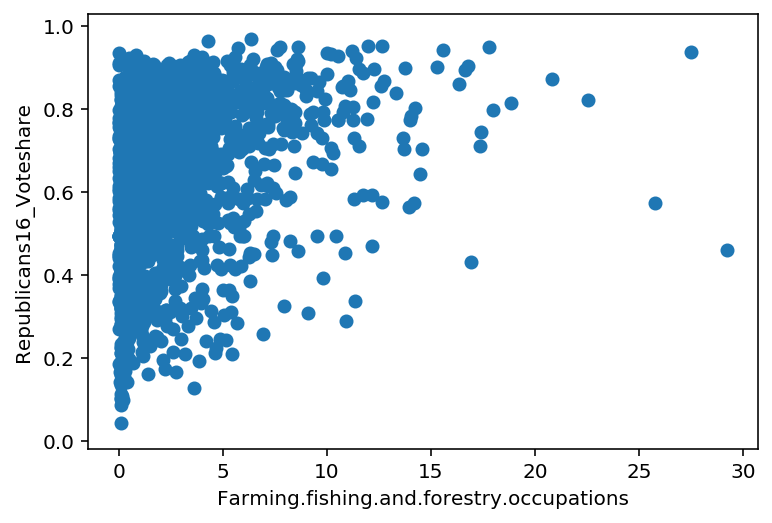

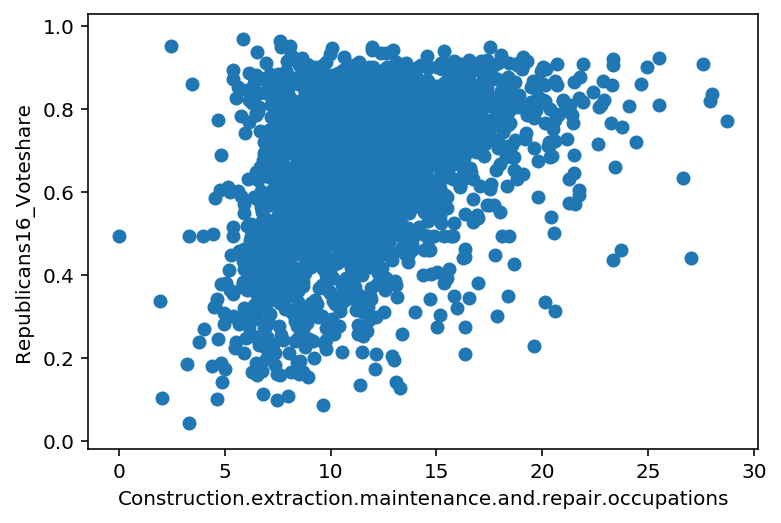

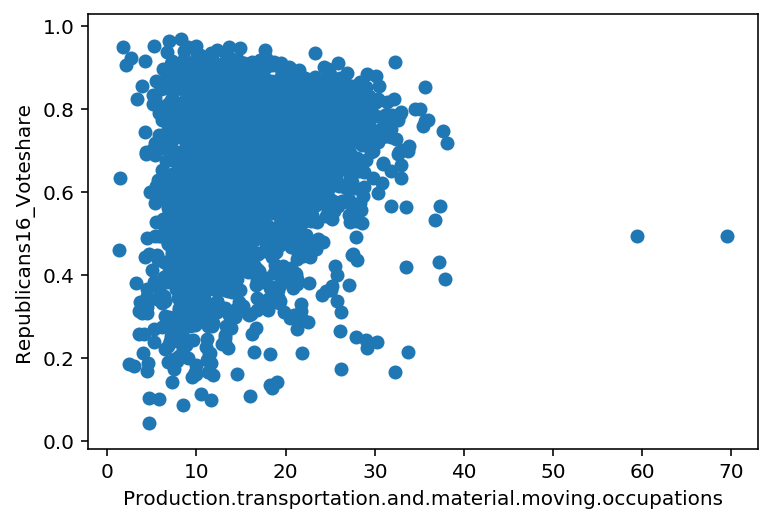

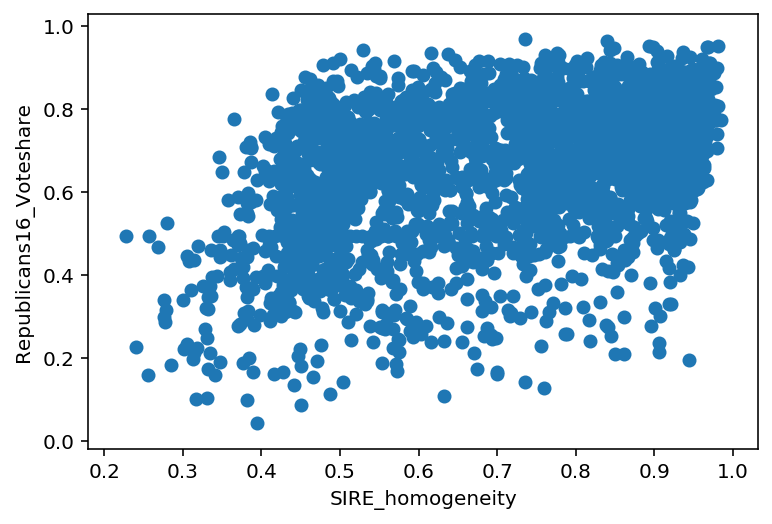

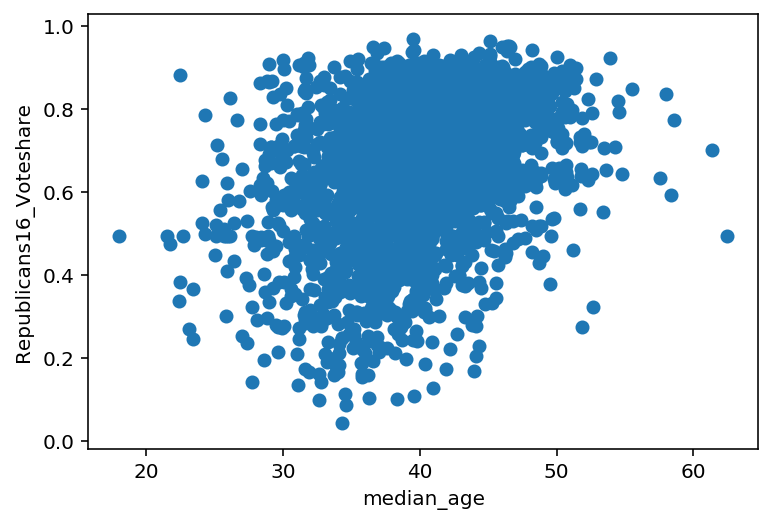

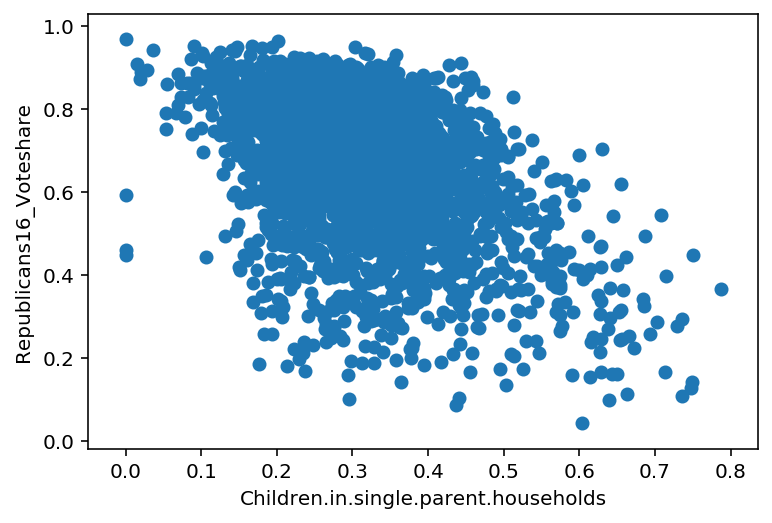

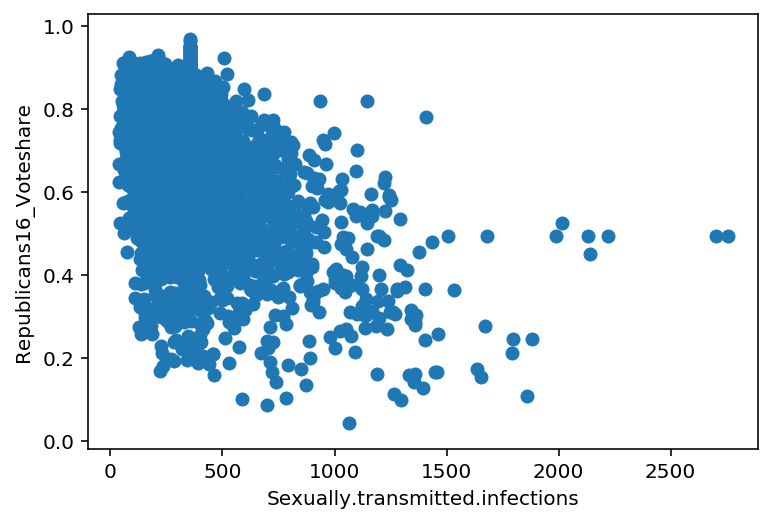

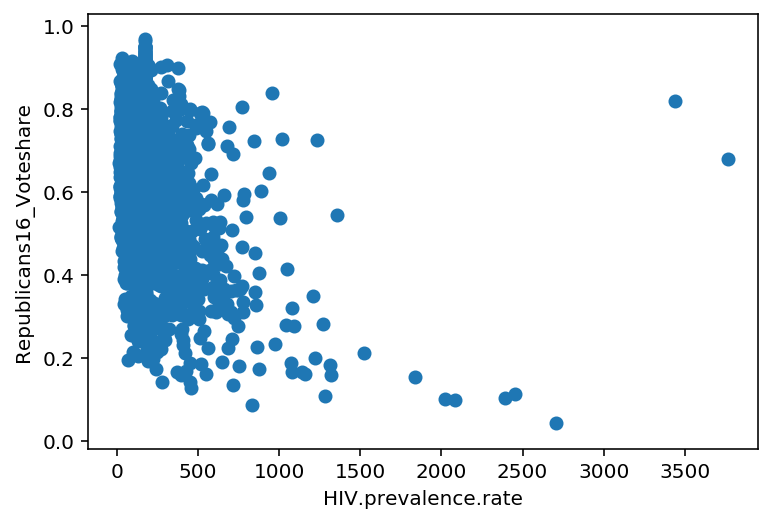

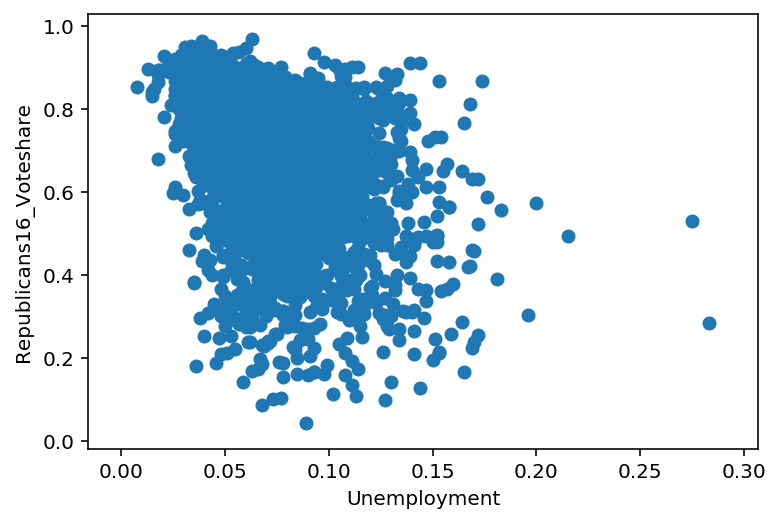

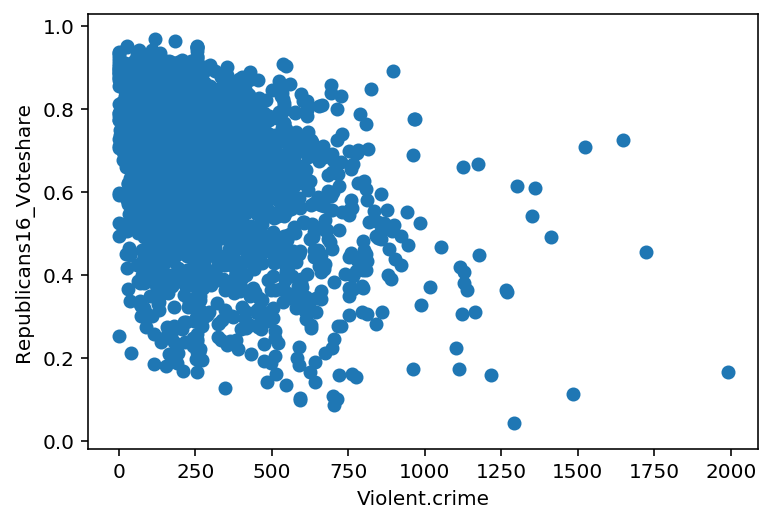

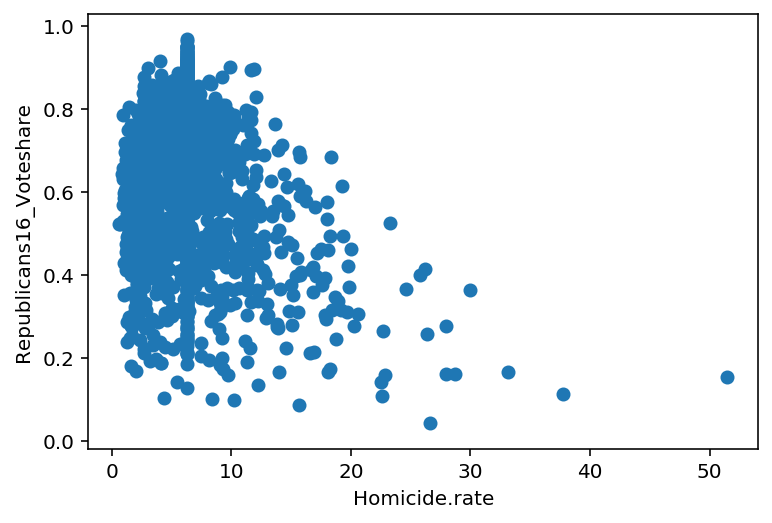

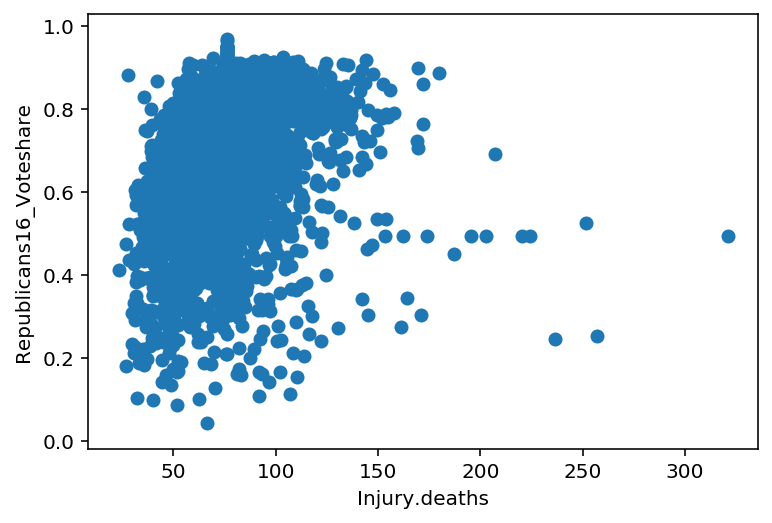

In [65]:
for col in X.columns: 
    plt.figure()
    plt.scatter(X[col],y)
    plt.ylabel('Republicans16_Voteshare')
    plt.xlabel(col)
    plt.show();

Some the plots do not display a linear relations and that may be an ussiue.
But for now I'll carry on with this model and rerun with changes later, so that I have something to compare to. 

In [66]:
import statsmodels.api as sm
#add constand to my X
X_withconstant = sm.add_constant(X)

C:\Users\renan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [67]:

# 1. Instantiate model
lm = sm.OLS(y,X_withconstant)

# 2. Fit model
lm_results = lm.fit()

lm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Republicans16_Voteshare   R-squared:                       0.760
Model:                                 OLS   Adj. R-squared:                  0.758
Method:                      Least Squares   F-statistic:                     317.8
Date:                     Sun, 02 Feb 2020   Prob (F-statistic):               0.00
Time:                             19:30:51   Log-Likelihood:                 3522.1
No. Observations:                     3141   AIC:                            -6980.
Df Residuals:                         3109   BIC:                            -6787.
Df Model:                               31                                         
Covariance Type:                 nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -2.3277      4.034     -0.577      0.564     -10.237       5.581
Precincts                                                  -5.926e-05    2.2e-05     -2.698      0.007      -0.000   -1.62e-05
Votes                                                      -3.097e-07   5.95e-08     -5.206      0.000   -4.26e-07   -1.93e-07
At Least Bachelors's Degree                                   -0.0077      0.001    -13.382      0.000      -0.009      -0.007
Graduate Degree                                               -0.0072      0.001     -6.778      0.000      -0.009      -0.005
Median Earnings 2010                                       -1.595e-06   5.01e-07     -3.185      0.001   -2.58e-06   -6.13e-07
White (Not Latino) Population                                  0.0376      0.029      1.290      0.197      -0.020       0.095
African American Population                                    0.0307      0.029      1.053      0.292      -0.026       0.088
Native American Population                                     0.0311      0.029      1.067      0.286      -0.026       0.088
Asian American Population                                      0.0293      0.029      1.004      0.315      -0.028       0.087
Other Race or Races                                            0.0289      0.029      0.988      0.323      -0.028       0.086
Latino Population                                              0.0321      0.029      1.101      0.271      -0.025       0.089
Total Population                                             1.02e-07   2.34e-08      4.358      0.000    5.61e-08    1.48e-07
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4              -0.0002      0.000     -2.302      0.021      -0.000   -3.61e-05
Poverty.Rate.below.federal.poverty.threshold                  -0.0028      0.001     -3.490      0.000      -0.004      -0.001
Gini.Coefficient                                               0.3114      0.057      5.477      0.000       0.200       0.423
Child.Poverty.living.in.families.below.the.poverty.line        0.0025      0.000      5.575      0.000       0.002       0.003
Management.professional.and.related.occupations                0.0024      0.028      0.085      0.933      -0.052       0.057
Service.occupations                                           -0.0047      0.028     -0.168      0.866      -0.060       0.050
Sales.and.office.occupations                                  -0.0007      0.028     -0.024      0.981      -0.055       0.054
Farming.fishing.and.forestry.occupations                       0.0013      0.028      0.048      0.962     

as expected there seems to be multicollinearity in some of the variables. specially the ethnicity columns and occupation columns. If a county has more people from one ethnicity, there will be less people from other ethnicities and so on.
This was expected as all combined come to 100%, so at least one of then is already explained by the others.

how do I deal with this?


https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

https://www.youtube.com/watch?v=Cba9LJ9lS8s - specially from minute 12


My model is predictive, so relying on the R-squared result to determine it's fit, the X multicollineality does not affect that. I might not even need to worry about it

So I start by just removing the variables that don't have high multicollinearity and a high P value to check it the model improves.


In [68]:
X_withconstant1 = X_withconstant.drop(['Sexually.transmitted.infections','HIV.prevalence.rate'], axis = 1)

In [69]:
# 1. Instantiate model
lm = sm.OLS(y,X_withconstant1)

# 2. Fit model
lm_results = lm.fit()

lm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Republicans16_Voteshare   R-squared:                       0.760
Model:                                 OLS   Adj. R-squared:                  0.758
Method:                      Least Squares   F-statistic:                     339.5
Date:                     Sun, 02 Feb 2020   Prob (F-statistic):               0.00
Time:                             19:30:51   Log-Likelihood:                 3520.5
No. Observations:                     3141   AIC:                            -6981.
Df Residuals:                         3111   BIC:                            -6799.
Df Model:                               29                                         
Covariance Type:                 nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -2.3059      4.034     -0.572      0.568     -10.216       5.604
Precincts                                                  -5.985e-05   2.19e-05     -2.729      0.006      -0.000   -1.68e-05
Votes                                                      -3.143e-07   5.94e-08     -5.288      0.000   -4.31e-07   -1.98e-07
At Least Bachelors's Degree                                   -0.0076      0.001    -13.323      0.000      -0.009      -0.006
Graduate Degree                                               -0.0073      0.001     -6.839      0.000      -0.009      -0.005
Median Earnings 2010                                       -1.599e-06   4.97e-07     -3.215      0.001   -2.57e-06   -6.24e-07
White (Not Latino) Population                                  0.0386      0.029      1.323      0.186      -0.019       0.096
African American Population                                    0.0316      0.029      1.082      0.279      -0.026       0.089
Native American Population                                     0.0320      0.029      1.097      0.273      -0.025       0.089
Asian American Population                                      0.0301      0.029      1.032      0.302      -0.027       0.087
Other Race or Races                                            0.0299      0.029      1.025      0.306      -0.027       0.087
Latino Population                                              0.0331      0.029      1.133      0.257      -0.024       0.090
Total Population                                            1.025e-07   2.34e-08      4.379      0.000    5.66e-08    1.48e-07
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4              -0.0002      0.000     -2.272      0.023      -0.000   -3.29e-05
Poverty.Rate.below.federal.poverty.threshold                  -0.0027      0.001     -3.391      0.001      -0.004      -0.001
Gini.Coefficient                                               0.3056      0.057      5.382      0.000       0.194       0.417
Child.Poverty.living.in.families.below.the.poverty.line        0.0025      0.000      5.542      0.000       0.002       0.003
Management.professional.and.related.occupations                0.0011      0.028      0.040      0.968      -0.054       0.056
Service.occupations                                           -0.0060      0.028     -0.214      0.831      -0.061       0.049
Sales.and.office.occupations                                  -0.0018      0.028     -0.064      0.949      -0.057       0.053
Farming.fishing.and.forestry.occupations                       0.0001      0.028      0.004      0.997     

This had no affect on my R-squared -still at .760 - IT just shows that the correlated variables do not affect the capacity of the model to make predictions. 

In [70]:
# what is my variance inflatin factor?
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

Precincts                                                     7.864134e+00
Votes                                                         2.562360e+01
At Least Bachelors's Degree                                   7.207289e+01
Graduate Degree                                               3.222826e+01
Median Earnings 2010                                          8.457673e+01
White (Not Latino) Population                                 1.347923e+06
African American Population                                   5.796740e+04
Native American Population                                    1.193159e+04
Asian American Population                                     1.466697e+03
Other Race or Races                                           1.292090e+03
Latino Population                                             4.709702e+04
Total Population                                              2.912369e+01
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4              1.154289e+01
Poverty.Rate.below.federa

In [71]:
#What is my VIF

In [72]:
# Ill check for the correlations in X, first I just need to clean the columns I'm no longer using

X = X.drop(['Sexually.transmitted.infections','HIV.prevalence.rate'], axis = 1)


In [73]:
X.corr()

Precincts     Votes  \
Precincts                                            1.000000  0.895551   
Votes                                                0.895551  1.000000   
At Least Bachelors's Degree                          0.280708  0.402127   
Graduate Degree                                      0.279329  0.387677   
Median Earnings 2010                                 0.256367  0.350023   
White (Not Latino) Population                       -0.195055 -0.216412   
African American Population                          0.056569  0.080094   
Native American Population                          -0.032620 -0.044202   
Asian American Population                            0.418023  0.469538   
Other Race or Races                                  0.072584  0.098468   
Latino Population                                    0.162174  0.161560   
Total Population                                     0.924719  0.970212   
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4     0.117814  0.141587   
Poverty.Rate.below.federal.poverty.threshold        -0.077217 -0.132273   
Gini.Coefficient                                     0.131120  0.145052   
Child.Poverty.living.in.families.below.the.pove...  -0.065574 -0.119478   
Management.professional.and.related.occupations      0.203722  0.298712   
Service.occupations                                 -0.013762 -0.053443   
Sales.and.office.occupations                         0.205222  0.279807   
Farming.fishing.and.forestry.occupations            -0.143445 -0.200642   
Construction.extraction.maintenance.and.repair....  -0.194568 -0.238044   
Production.transportation.and.material.moving.o...  -0.154986 -0.226355   
SIRE_homogeneity                                    -0.238249 -0.287585   
median_age                                          -0.157243 -0.190380   
Children.in.single.parent.households                 0.044680  0.035691   
Unemployment                                         0.069782  0.041339   
Violent.crime                                        0.209588  0.248497   
Homicide.rate                                        0.022602 -0.022633   
Injury.deaths                                       -0.202936 -0.253944   

                                                    At Least Bachelors's Degree  \
Precincts                                                              0.280708   
Votes                                                                  0.402127   
At Least Bachelors's Degree                                            1.000000   
Graduate Degree                                                        0.920419   
Median Earnings 2010                                                   0.512360   
White (Not Latino) Population                                          0.011166   
African American Population                                           -0.096380   
Native American Population                                            -0.063927   
Asian American Population                                              0.454123   
Other Race or Races                                                    0.134617   
Latino Population                                                      0.021540   
Total Population                                                       0.319743   
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4                       0.245414   
Poverty.Rate.below.federal.poverty.threshold                          -0.415864   
Gini.Coefficient                                                       0.087472   
Child.Poverty.living.in.families.below.the.pove...                    -0.476781   
Management.professional.and.related.occupations                        0.771892   
Service.occupations                                                   -0.125940   
Sales.and.office.occupations                                           0.305692   
Farming.fishing.and.forestry.occupations                              -0.225611   
Construction.extraction.maintenance.and.repair....        

In [74]:
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

Precincts                                                     7.841556e+00
Votes                                                         2.556795e+01
At Least Bachelors's Degree                                   7.124838e+01
Graduate Degree                                               3.213923e+01
Median Earnings 2010                                          8.331870e+01
White (Not Latino) Population                                 1.346186e+06
African American Population                                   5.791506e+04
Native American Population                                    1.192007e+04
Asian American Population                                     1.465125e+03
Other Race or Races                                           1.290346e+03
Latino Population                                             4.704031e+04
Total Population                                              2.911305e+01
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4              1.152677e+01
Poverty.Rate.below.federa

As expected there is a Correlattion in X, however they are all bellow 10 and don't seem to need any kind of adjustment. 

The columns Homicide.rate  and Poverty.Rate.below.federal.poverty.threshold have pretty high values, I'll see what hapens if I remove them from the model

In [75]:
X = X.drop(['Homicide.rate','Poverty.Rate.below.federal.poverty.threshold'], axis = 1)


In [76]:
#add constand to my X
X_withconstant = sm.add_constant(X)

In [77]:
# 1. Instantiate model
lm = sm.OLS(y,X_withconstant)

# 2. Fit model
lm_results = lm.fit()

lm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Republicans16_Voteshare   R-squared:                       0.758
Model:                                 OLS   Adj. R-squared:                  0.756
Method:                      Least Squares   F-statistic:                     361.7
Date:                     Sun, 02 Feb 2020   Prob (F-statistic):               0.00
Time:                             19:30:52   Log-Likelihood:                 3510.1
No. Observations:                     3141   AIC:                            -6964.
Df Residuals:                         3113   BIC:                            -6795.
Df Model:                               27                                         
Covariance Type:                 nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -1.9654      4.046     -0.486      0.627      -9.898       5.967
Precincts                                                  -6.496e-05   2.19e-05     -2.962      0.003      -0.000    -2.2e-05
Votes                                                      -3.015e-07   5.95e-08     -5.067      0.000   -4.18e-07   -1.85e-07
At Least Bachelors's Degree                                   -0.0074      0.001    -13.097      0.000      -0.009      -0.006
Graduate Degree                                               -0.0078      0.001     -7.359      0.000      -0.010      -0.006
Median Earnings 2010                                       -8.789e-07   4.62e-07     -1.904      0.057   -1.78e-06    2.61e-08
White (Not Latino) Population                                  0.0393      0.029      1.343      0.179      -0.018       0.097
African American Population                                    0.0319      0.029      1.089      0.276      -0.026       0.089
Native American Population                                     0.0325      0.029      1.111      0.267      -0.025       0.090
Asian American Population                                      0.0305      0.029      1.043      0.297      -0.027       0.088
Other Race or Races                                            0.0306      0.029      1.045      0.296      -0.027       0.088
Latino Population                                              0.0336      0.029      1.149      0.251      -0.024       0.091
Total Population                                            1.007e-07   2.35e-08      4.290      0.000    5.47e-08    1.47e-07
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4              -0.0002      0.000     -2.258      0.024      -0.000   -3.15e-05
Gini.Coefficient                                               0.2482      0.054      4.596      0.000       0.142       0.354
Child.Poverty.living.in.families.below.the.poverty.line        0.0013      0.000      4.770      0.000       0.001       0.002
Management.professional.and.related.occupations               -0.0033      0.028     -0.116      0.908      -0.058       0.052
Service.occupations                                           -0.0103      0.028     -0.369      0.712      -0.065       0.045
Sales.and.office.occupations                                  -0.0059      0.028     -0.211      0.833      -0.061       0.049
Farming.fishing.and.forestry.occupations                      -0.0044      0.028     -0.157      0.875      -0.059       0.051
Construction.extraction.maintenance.and.repair.occupations    -0.0023      0.028     -0.083      0.934     

The R-squared is a bit lower, lets check the covariance

In [79]:
VIF = pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

In [86]:
VIF.round(4)

Precincts                                                     7.794300e+00
Votes                                                         2.548890e+01
At Least Bachelors's Degree                                   7.001790e+01
Graduate Degree                                               3.130100e+01
Median Earnings 2010                                          7.133830e+01
White (Not Latino) Population                                 1.345179e+06
African American Population                                   5.788279e+04
Native American Population                                    1.191262e+04
Asian American Population                                     1.464297e+03
Other Race or Races                                           1.289384e+03
Latino Population                                             4.700854e+04
Total Population                                              2.909300e+01
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4              1.152440e+01
Gini.Coefficient         

### Anwser to Q3

##### Fit a statistical model that predicts the 2016 relative vote share of the Republican party within a county using the county-level demographic data. Explain why you chose that particular model. When building your model, answer the following questions:

A: As seen above I chose Multiple Linear Regression as my model as my variables are continuous
   We have two elections, independent observations for basicaly the same sample that represent the entire population, There is a linear relation from the data to vote share. 
   I am septical about the  multicollinearity in population and ocupation, but decided to look over that for this exercise as I just want to estimate the vote share, and not what aspects are affecting it the most. 


###### What are the data points? What are the independent and dependent variables?
A: the dependent value in this case is the Republicans voteshare, the data points are the share per county depending on population, education, crime ratios etc. 
 
###### How good is the fit of your model? What metric is a good measure to evaluate your model? Interpret your results.
The metric used in this csae is the R-squared. That is pointing out that the model can acertain 76% of the actual result. 
To be honest I am still very confused with the correlations in the population and occupation columns. As much as I understand they do not affect thee R-squared it isn't clear to me if there is better option around the issue found. 

I did attempt improving my R-squared by dropping one column of the population and occupations. As whatever I drop can be explained by the other columns, but I'm leaving it after my answer of 76% as I'm not sure this is a valid appproach. 

In [87]:
X = X.drop(['Production.transportation.and.material.moving.occupations','Latino Population'], axis = 1)

In [88]:
#add constand to my X
X_withconstant = sm.add_constant(X)

In [89]:
# 1. Instantiate model
lm = sm.OLS(y,X_withconstant)

# 2. Fit model
lm_results = lm.fit()

lm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Republicans16_Voteshare   R-squared:                       0.758
Model:                                 OLS   Adj. R-squared:                  0.756
Method:                      Least Squares   F-statistic:                     390.7
Date:                     Sun, 02 Feb 2020   Prob (F-statistic):               0.00
Time:                             19:49:41   Log-Likelihood:                 3509.4
No. Observations:                     3141   AIC:                            -6967.
Df Residuals:                         3115   BIC:                            -6810.
Df Model:                               25                                         
Covariance Type:                 nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                          0.6628      0.041     16.289      0.000       0.583       0.743
Precincts                                                  -6.498e-05   2.19e-05     -2.963      0.003      -0.000    -2.2e-05
Votes                                                      -3.009e-07   5.95e-08     -5.057      0.000   -4.18e-07   -1.84e-07
At Least Bachelors's Degree                                   -0.0074      0.001    -13.074      0.000      -0.009      -0.006
Graduate Degree                                               -0.0078      0.001     -7.406      0.000      -0.010      -0.006
Median Earnings 2010                                       -8.926e-07   4.61e-07     -1.935      0.053    -1.8e-06     1.2e-08
White (Not Latino) Population                                  0.0057      0.000     32.168      0.000       0.005       0.006
African American Population                                   -0.0018      0.000     -9.973      0.000      -0.002      -0.001
Native American Population                                    -0.0011      0.000     -4.105      0.000      -0.002      -0.001
Asian American Population                                     -0.0031      0.001     -3.656      0.000      -0.005      -0.001
Other Race or Races                                           -0.0030      0.001     -3.287      0.001      -0.005      -0.001
Total Population                                            1.006e-07   2.35e-08      4.288      0.000    5.46e-08    1.47e-07
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4              -0.0002      0.000     -2.251      0.024      -0.000   -3.07e-05
Gini.Coefficient                                               0.2471      0.054      4.581      0.000       0.141       0.353
Child.Poverty.living.in.families.below.the.poverty.line        0.0013      0.000      4.775      0.000       0.001       0.002
Management.professional.and.related.occupations                0.0041      0.000      9.060      0.000       0.003       0.005
Service.occupations                                           -0.0030      0.001     -5.859      0.000      -0.004      -0.002
Sales.and.office.occupations                                   0.0015      0.001      2.674      0.008       0.000       0.003
Farming.fishing.and.forestry.occupations                       0.0029      0.001      3.954      0.000       0.001       0.004
Construction.extraction.maintenance.and.repair.occupations     0.0050      0.001      9.038      0.000       0.004       0.006
SIRE_homogeneity                                              -0.3934      0.017    -23.825      0.000     

Despite loosing a little on my R-squared I'd say a model with less correlations would be a more reliable model. 

Other places I went for help and clarification:

https://statisticsbyjim.com/regression/choosing-regression-analysis/

https://dzone.com/articles/correlation-between-categorical-and-continuous-var-1

https://online.stat.psu.edu/stat462/node/182/

https://etav.github.io/python/vif_factor_python.html

